# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [27]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')

In [28]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [30]:
# Try loading one file

df_Jan2023 = pd.read_parquet('/content/yellow_tripdata_2023-01.parquet')
df_Jan2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [31]:
df_Jan2023.shape

(3066766, 19)

In [32]:
df_Jan2023.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [33]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

In [34]:
df_Jan2023['hour'] = df_Jan2023["tpep_pickup_datetime"].dt.hour

In [35]:
sample_df_Jan2023 = df_Jan2023.groupby("hour").sample(frac=0.05, random_state=42)
sample_df_Jan2023.to_parquet("/content/drive/My Drive/Colab Notebooks/Assignments/nyc_taxi_sample1.parquet", index=False)

In [36]:
df_Feb2023 = pd.read_parquet('/content/yellow_tripdata_2023-02.parquet')

In [37]:
df_Feb2023['hour'] = df_Feb2023["tpep_pickup_datetime"].dt.hour

In [38]:
sample_df_Feb2023 = df_Feb2023.groupby("hour").sample(frac=0.05, random_state=42)
sample_df_Feb2023.to_parquet("/content/drive/My Drive/Colab Notebooks/Assignments/nyc_taxi_sample2.parquet", index=False)

In [39]:
df_Mar2023 = pd.read_parquet('/content/yellow_tripdata_2023-03.parquet')
df_Mar2023['hour'] = df_Mar2023["tpep_pickup_datetime"].dt.hour
sample_df_Mar2023 = df_Mar2023.groupby("hour").sample(frac=0.05, random_state=42)
sample_df_Mar2023.to_parquet("/content/drive/My Drive/Colab Notebooks/Assignments/nyc_taxi_sample3.parquet", index=False)

In [40]:
df_Apr2023 = pd.read_parquet('/content/yellow_tripdata_2023-04.parquet')
df_Apr2023['hour'] = df_Apr2023["tpep_pickup_datetime"].dt.hour
sample_df_Apr2023 = df_Apr2023.groupby("hour").sample(frac=0.05, random_state=42)
sample_df_Apr2023.to_parquet("/content/drive/My Drive/Colab Notebooks/Assignments/nyc_taxi_sample4.parquet", index=False)

In [41]:
df_May2023 = pd.read_parquet('/content/yellow_tripdata_2023-05.parquet')
df_May2023['hour'] = df_May2023["tpep_pickup_datetime"].dt.hour
sample_df_May2023 = df_May2023.groupby("hour").sample(frac=0.05, random_state=42)
sample_df_May2023.to_parquet("/content/drive/My Drive/Colab Notebooks/Assignments/nyc_taxi_sample5.parquet", index=False)

In [42]:
df_Jun2023 = pd.read_parquet('/content/yellow_tripdata_2023-06.parquet')
df_Jun2023['hour'] = df_Jun2023["tpep_pickup_datetime"].dt.hour
sample_df_Jun2023 = df_Jun2023.groupby("hour").sample(frac=0.05, random_state=42)
sample_df_Jun2023.to_parquet("/content/drive/My Drive/Colab Notebooks/Assignments/nyc_taxi_sample6.parquet", index=False)

In [43]:
df_Jul2023 = pd.read_parquet('/content/yellow_tripdata_2023-07.parquet')
df_Jul2023['hour'] = df_Jul2023["tpep_pickup_datetime"].dt.hour
sample_df_Jul2023 = df_Jul2023.groupby("hour").sample(frac=0.05, random_state=42)
sample_df_Jul2023.to_parquet("/content/drive/My Drive/Colab Notebooks/Assignments/nyc_taxi_sample7.parquet", index=False)

In [44]:
df_Aug2023 = pd.read_parquet('/content/yellow_tripdata_2023-08.parquet')
df_Aug2023['hour'] = df_Aug2023["tpep_pickup_datetime"].dt.hour
sample_df_Aug2023 = df_Aug2023.groupby("hour").sample(frac=0.05, random_state=42)
sample_df_Aug2023.to_parquet("/content/drive/My Drive/Colab Notebooks/Assignments/nyc_taxi_sample8.parquet", index=False)

In [45]:
df_Sep2023 = pd.read_parquet('/content/yellow_tripdata_2023-09.parquet')
df_Sep2023['hour'] = df_Sep2023["tpep_pickup_datetime"].dt.hour
sample_df_Sep2023 = df_Sep2023.groupby("hour").sample(frac=0.05, random_state=42)
sample_df_Sep2023.to_parquet("/content/drive/My Drive/Colab Notebooks/Assignments/nyc_taxi_sample9.parquet", index=False)

In [46]:
df_Oct2023 = pd.read_parquet('/content/yellow_tripdata_2023-10.parquet')
df_Oct2023['hour'] = df_Oct2023["tpep_pickup_datetime"].dt.hour
sample_df_Oct2023 = df_Oct2023.groupby("hour").sample(frac=0.05, random_state=42)
sample_df_Oct2023.to_parquet("/content/drive/My Drive/Colab Notebooks/Assignments/nyc_taxi_sample10.parquet", index=False)

In [47]:
df_Nov2023 = pd.read_parquet('/content/yellow_tripdata_2023-11.parquet')
df_Nov2023['hour'] = df_Nov2023["tpep_pickup_datetime"].dt.hour
sample_df_Nov2023 = df_Nov2023.groupby("hour").sample(frac=0.05, random_state=42)
sample_df_Nov2023.to_parquet("/content/drive/My Drive/Colab Notebooks/Assignments/nyc_taxi_sample11.parquet", index=False)

In [48]:
df_Dec2023 = pd.read_parquet('/content/yellow_tripdata_2023-12.parquet')
df_Dec2023['hour'] = df_Dec2023["tpep_pickup_datetime"].dt.hour
sample_df_Dec2023 = df_Dec2023.groupby("hour").sample(frac=0.05, random_state=42)
sample_df_Dec2023.to_parquet("/content/drive/My Drive/Colab Notebooks/Assignments/nyc_taxi_sample12.parquet", index=False)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [49]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [50]:
final_sample = pd.concat([sample_df_Jan2023, sample_df_Feb2023, sample_df_Mar2023, sample_df_Apr2023, sample_df_May2023, sample_df_Jun2023, sample_df_Jul2023, sample_df_Aug2023, sample_df_Sep2023, sample_df_Oct2023, sample_df_Nov2023, sample_df_Dec2023])
final_sample.to_parquet("/content/drive/My Drive/Colab Notebooks/Assignments/final_sample.parquet", index=False)

In [51]:
# from google.colab import drive
# drive.mount('/content/drive')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('drive/My Drive/Colab Notebooks/Assignments')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file



        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date

            # Iterate through each hour of the selected date

                # Sample 5% of the hourly data randomly

                # add data of this hour to the dataframe

        # Concatenate the sampled data of all the dates to a single dataframe
        # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

In [53]:
final_sample_df = pd.DataFrame(final_sample)
final_sample_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,hour,Airport_fee
1585021,2,2023-01-18 00:32:54,2023-01-18 00:45:04,1.0,3.21,1.0,N,158,161,1,...,1.0,0.5,4.12,0.0,1.0,24.72,2.5,0.0,0,NaN
1316375,1,2023-01-15 00:17:26,2023-01-15 00:27:34,1.0,1.50,1.0,N,144,107,1,...,3.5,0.5,3.95,0.0,1.0,19.65,2.5,0.0,0,NaN
2622384,1,2023-01-28 00:46:31,2023-01-28 00:53:58,1.0,1.30,1.0,N,249,90,1,...,3.5,0.5,1.00,0.0,1.0,15.30,2.5,0.0,0,NaN
2623404,1,2023-01-28 00:57:26,2023-01-28 01:02:03,1.0,1.10,1.0,N,237,48,1,...,3.5,0.5,3.65,0.0,1.0,15.85,2.5,0.0,0,NaN
2733608,2,2023-01-29 00:32:44,2023-01-29 00:42:06,2.0,0.99,1.0,N,148,113,2,...,1.0,0.5,0.00,0.0,1.0,15.00,2.5,0.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822038,2,2023-12-07 23:22:23,2023-12-07 23:42:49,1.0,7.49,1.0,N,87,263,1,...,1.0,0.5,7.20,0.0,1.0,43.20,2.5,NaN,23,0.0
3123026,1,2023-12-30 23:28:20,2023-12-30 23:35:00,1.0,0.80,1.0,N,211,148,1,...,3.5,0.5,2.45,0.0,1.0,14.65,2.5,NaN,23,0.0
690380,2,2023-12-06 23:00:02,2023-12-06 23:07:01,1.0,1.06,1.0,N,100,170,1,...,1.0,0.5,2.72,0.0,1.0,16.32,2.5,NaN,23,0.0
820878,2,2023-12-07 23:45:27,2023-12-07 23:55:33,1.0,1.52,1.0,N,113,164,1,...,1.0,0.5,3.28,0.0,1.0,19.68,2.5,NaN,23,0.0


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [54]:
# Store the df in csv/parquet
# df.to_parquet('')
final_sample_df.to_parquet("/content/drive/My Drive/Colab Notebooks/Assignments/final_sample_df.parquet", index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [55]:
# Load the new data file
df = pd.read_parquet('/content/drive/My Drive/Colab Notebooks/Assignments/final_sample_df.parquet')
df = pd.DataFrame(df)

In [56]:
# df.head()
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,hour,Airport_fee
0,2,2023-01-18 00:32:54,2023-01-18 00:45:04,1.0,3.21,1.0,N,158,161,1,...,1.0,0.5,4.12,0.0,1.0,24.72,2.5,0.0,0,NaN
1,1,2023-01-15 00:17:26,2023-01-15 00:27:34,1.0,1.50,1.0,N,144,107,1,...,3.5,0.5,3.95,0.0,1.0,19.65,2.5,0.0,0,NaN
2,1,2023-01-28 00:46:31,2023-01-28 00:53:58,1.0,1.30,1.0,N,249,90,1,...,3.5,0.5,1.00,0.0,1.0,15.30,2.5,0.0,0,NaN
3,1,2023-01-28 00:57:26,2023-01-28 01:02:03,1.0,1.10,1.0,N,237,48,1,...,3.5,0.5,3.65,0.0,1.0,15.85,2.5,0.0,0,NaN
4,2,2023-01-29 00:32:44,2023-01-29 00:42:06,2.0,0.99,1.0,N,148,113,2,...,1.0,0.5,0.00,0.0,1.0,15.00,2.5,0.0,0,NaN


In [57]:
# df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915503 entries, 0 to 1915502
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

In [58]:
df.isna().sum()

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,65158
trip_distance,0
RatecodeID,65158
store_and_fwd_flag,65158
PULocationID,0
DOLocationID,0
payment_type,0


In [59]:
missing_values = (df.isna().sum() / len(df)) * 100
missing_values


,0
VendorID,0.000000
tpep_pickup_datetime,0.000000
tpep_dropoff_datetime,0.000000
passenger_count,3.401613
trip_distance,0.000000
RatecodeID,3.401613
store_and_fwd_flag,3.401613
PULocationID,0.000000
DOLocationID,0.000000
payment_type,0.000000


**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [60]:
# Fix the index and drop any columns that are not needed

df = df.reset_index(drop=True)
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,hour,Airport_fee
0,2,2023-01-18 00:32:54,2023-01-18 00:45:04,1.0,3.21,1.0,N,158,161,1,...,1.0,0.5,4.12,0.0,1.0,24.72,2.5,0.0,0,NaN
1,1,2023-01-15 00:17:26,2023-01-15 00:27:34,1.0,1.50,1.0,N,144,107,1,...,3.5,0.5,3.95,0.0,1.0,19.65,2.5,0.0,0,NaN
2,1,2023-01-28 00:46:31,2023-01-28 00:53:58,1.0,1.30,1.0,N,249,90,1,...,3.5,0.5,1.00,0.0,1.0,15.30,2.5,0.0,0,NaN
3,1,2023-01-28 00:57:26,2023-01-28 01:02:03,1.0,1.10,1.0,N,237,48,1,...,3.5,0.5,3.65,0.0,1.0,15.85,2.5,0.0,0,NaN
4,2,2023-01-29 00:32:44,2023-01-29 00:42:06,2.0,0.99,1.0,N,148,113,2,...,1.0,0.5,0.00,0.0,1.0,15.00,2.5,0.0,0,NaN


In [61]:
df_clean = df.drop(columns = ['VendorID'])
df_clean.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,hour,Airport_fee
0,2023-01-18 00:32:54,2023-01-18 00:45:04,1.0,3.21,1.0,N,158,161,1,15.6,1.0,0.5,4.12,0.0,1.0,24.72,2.5,0.0,0,NaN
1,2023-01-15 00:17:26,2023-01-15 00:27:34,1.0,1.50,1.0,N,144,107,1,10.7,3.5,0.5,3.95,0.0,1.0,19.65,2.5,0.0,0,NaN
2,2023-01-28 00:46:31,2023-01-28 00:53:58,1.0,1.30,1.0,N,249,90,1,9.3,3.5,0.5,1.00,0.0,1.0,15.30,2.5,0.0,0,NaN
3,2023-01-28 00:57:26,2023-01-28 01:02:03,1.0,1.10,1.0,N,237,48,1,7.2,3.5,0.5,3.65,0.0,1.0,15.85,2.5,0.0,0,NaN
4,2023-01-29 00:32:44,2023-01-29 00:42:06,2.0,0.99,1.0,N,148,113,2,10.0,1.0,0.5,0.00,0.0,1.0,15.00,2.5,0.0,0,NaN


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [62]:
df_clean.columns = df_clean.columns.str.strip()

In [63]:
selected_columns=df_clean[['Airport_fee','airport_fee']]
print(selected_columns)

         Airport_fee  airport_fee
0                NaN          0.0
1                NaN          0.0
2                NaN          0.0
3                NaN          0.0
4                NaN          0.0
...              ...          ...
1915498          0.0          NaN
1915499          0.0          NaN
1915500          0.0          NaN
1915501          0.0          NaN
1915502          0.0          NaN

[1915503 rows x 2 columns]


Have combined "Airport_fee" and "airport_fee" column like wherever we have NaN it picked the value from another column.

In [64]:
df_clean['airport_fee'] = df_clean['airport_fee'].combine_first(df_clean['Airport_fee'])
df_clean.drop(columns=['Airport_fee'], inplace=True)
df_clean.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,hour
0,2023-01-18 00:32:54,2023-01-18 00:45:04,1.0,3.21,1.0,N,158,161,1,15.6,1.0,0.5,4.12,0.0,1.0,24.72,2.5,0.0,0
1,2023-01-15 00:17:26,2023-01-15 00:27:34,1.0,1.50,1.0,N,144,107,1,10.7,3.5,0.5,3.95,0.0,1.0,19.65,2.5,0.0,0
2,2023-01-28 00:46:31,2023-01-28 00:53:58,1.0,1.30,1.0,N,249,90,1,9.3,3.5,0.5,1.00,0.0,1.0,15.30,2.5,0.0,0
3,2023-01-28 00:57:26,2023-01-28 01:02:03,1.0,1.10,1.0,N,237,48,1,7.2,3.5,0.5,3.65,0.0,1.0,15.85,2.5,0.0,0
4,2023-01-29 00:32:44,2023-01-29 00:42:06,2.0,0.99,1.0,N,148,113,2,10.0,1.0,0.5,0.00,0.0,1.0,15.00,2.5,0.0,0


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [65]:
# check where values of fare amount are negative

negative_values = df_clean[df_clean['fare_amount'] < 0]

Did you notice something different in the `RatecodeID` column for above records?  - Yes, the 1 rating have most numer of negative values

In [66]:
# Analyse RatecodeID for the negative fare amounts
Ratecode_counts = negative_values['RatecodeID'].value_counts()
Ratecode_counts

,count
RatecodeID,
1.0,16631
2.0,1316
5.0,323
3.0,233
4.0,99


In [67]:
# Find which columns have negative values

numerical_columns = df_clean.select_dtypes(include=np.number).columns.tolist()
numerical_columns


['passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'hour']

In [68]:
# fix these negative values

for col in ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']:
  df_clean.loc[df_clean[col] < 0, col] = 0

In [69]:
df_cleaned = df_clean[~(df_clean[numerical_columns] < 0).any(axis=1)]
df_cleaned.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,hour
0,2023-01-18 00:32:54,2023-01-18 00:45:04,1.0,3.21,1.0,N,158,161,1,15.6,1.0,0.5,4.12,0.0,1.0,24.72,2.5,0.0,0
1,2023-01-15 00:17:26,2023-01-15 00:27:34,1.0,1.50,1.0,N,144,107,1,10.7,3.5,0.5,3.95,0.0,1.0,19.65,2.5,0.0,0
2,2023-01-28 00:46:31,2023-01-28 00:53:58,1.0,1.30,1.0,N,249,90,1,9.3,3.5,0.5,1.00,0.0,1.0,15.30,2.5,0.0,0
3,2023-01-28 00:57:26,2023-01-28 01:02:03,1.0,1.10,1.0,N,237,48,1,7.2,3.5,0.5,3.65,0.0,1.0,15.85,2.5,0.0,0
4,2023-01-29 00:32:44,2023-01-29 00:42:06,2.0,0.99,1.0,N,148,113,2,10.0,1.0,0.5,0.00,0.0,1.0,15.00,2.5,0.0,0


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [70]:
# Find the proportion of missing values in each column
Missing_values = (df_cleaned.isna().sum() / len(df_cleaned)) * 100
Missing_values


,0
tpep_pickup_datetime,0.000000
tpep_dropoff_datetime,0.000000
passenger_count,3.401613
trip_distance,0.000000
RatecodeID,3.401613
store_and_fwd_flag,3.401613
PULocationID,0.000000
DOLocationID,0.000000
payment_type,0.000000
fare_amount,0.000000


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [71]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df_NullValues = df_cleaned[df_cleaned.isna().any(axis=1)]
df_NullValues

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,hour
55,2023-01-01 00:54:33,2023-01-01 01:28:30,NaN,11.68,NaN,None,263,188,0,50.86,0.0,0.5,11.97,0.0,1.0,66.83,NaN,NaN,0
62,2023-01-29 00:03:14,2023-01-29 00:22:55,NaN,5.09,NaN,None,249,238,0,23.44,0.0,0.5,5.49,0.0,1.0,32.93,NaN,NaN,0
99,2023-01-22 00:39:47,2023-01-22 00:56:11,NaN,3.64,NaN,None,148,141,0,25.11,0.0,0.5,5.82,0.0,1.0,34.93,NaN,NaN,0
138,2023-01-01 00:42:00,2023-01-01 00:50:00,NaN,1.78,NaN,None,79,137,0,13.77,0.0,0.5,3.55,0.0,1.0,21.32,NaN,NaN,0
156,2023-01-15 00:38:33,2023-01-15 00:53:00,NaN,3.01,NaN,None,144,162,0,16.24,0.0,0.5,0.76,0.0,1.0,21.00,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915375,2023-12-10 23:03:22,2023-12-10 23:27:34,NaN,7.25,NaN,None,114,166,0,33.02,0.0,0.5,0.00,0.0,1.0,37.02,NaN,NaN,23
1915409,2023-12-16 23:06:43,2023-12-16 23:18:14,NaN,1.87,NaN,None,164,158,0,24.39,0.0,0.5,0.00,0.0,1.0,28.39,NaN,NaN,23
1915410,2023-12-16 23:50:47,2023-12-17 00:14:42,NaN,2.32,NaN,None,90,148,0,18.87,0.0,0.5,0.00,0.0,1.0,22.87,NaN,NaN,23
1915439,2023-12-27 23:32:38,2023-12-27 23:50:16,NaN,4.04,NaN,None,76,89,0,21.04,0.0,0.5,0.00,0.0,1.0,22.54,NaN,NaN,23


In [72]:
missing_count_PC = df_cleaned['passenger_count'].isna().sum()
missing_count_PC

np.int64(65158)

In [73]:
df_cleaned['passenger_count'].fillna(df_cleaned['passenger_count'].mode()[0], inplace=True)
df_cleaned.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,hour
0,2023-01-18 00:32:54,2023-01-18 00:45:04,1.0,3.21,1.0,N,158,161,1,15.6,1.0,0.5,4.12,0.0,1.0,24.72,2.5,0.0,0
1,2023-01-15 00:17:26,2023-01-15 00:27:34,1.0,1.50,1.0,N,144,107,1,10.7,3.5,0.5,3.95,0.0,1.0,19.65,2.5,0.0,0
2,2023-01-28 00:46:31,2023-01-28 00:53:58,1.0,1.30,1.0,N,249,90,1,9.3,3.5,0.5,1.00,0.0,1.0,15.30,2.5,0.0,0
3,2023-01-28 00:57:26,2023-01-28 01:02:03,1.0,1.10,1.0,N,237,48,1,7.2,3.5,0.5,3.65,0.0,1.0,15.85,2.5,0.0,0
4,2023-01-29 00:32:44,2023-01-29 00:42:06,2.0,0.99,1.0,N,148,113,2,10.0,1.0,0.5,0.00,0.0,1.0,15.00,2.5,0.0,0


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [74]:
# Fix missing values in 'RatecodeID'
missing_count_RID = df_cleaned['RatecodeID'].isna().sum()
missing_count_RID

np.int64(65158)

In [75]:
df_cleaned['RatecodeID'].fillna(df_cleaned['RatecodeID'].median(), inplace=True)
df_cleaned.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,hour
0,2023-01-18 00:32:54,2023-01-18 00:45:04,1.0,3.21,1.0,N,158,161,1,15.6,1.0,0.5,4.12,0.0,1.0,24.72,2.5,0.0,0
1,2023-01-15 00:17:26,2023-01-15 00:27:34,1.0,1.50,1.0,N,144,107,1,10.7,3.5,0.5,3.95,0.0,1.0,19.65,2.5,0.0,0
2,2023-01-28 00:46:31,2023-01-28 00:53:58,1.0,1.30,1.0,N,249,90,1,9.3,3.5,0.5,1.00,0.0,1.0,15.30,2.5,0.0,0
3,2023-01-28 00:57:26,2023-01-28 01:02:03,1.0,1.10,1.0,N,237,48,1,7.2,3.5,0.5,3.65,0.0,1.0,15.85,2.5,0.0,0
4,2023-01-29 00:32:44,2023-01-29 00:42:06,2.0,0.99,1.0,N,148,113,2,10.0,1.0,0.5,0.00,0.0,1.0,15.00,2.5,0.0,0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [76]:
# handle null values in congestion_surcharge

df_cleaned['congestion_surcharge'].fillna(df_cleaned['congestion_surcharge'].mode()[0], inplace=True)
df_cleaned.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,hour
0,2023-01-18 00:32:54,2023-01-18 00:45:04,1.0,3.21,1.0,N,158,161,1,15.6,1.0,0.5,4.12,0.0,1.0,24.72,2.5,0.0,0
1,2023-01-15 00:17:26,2023-01-15 00:27:34,1.0,1.50,1.0,N,144,107,1,10.7,3.5,0.5,3.95,0.0,1.0,19.65,2.5,0.0,0
2,2023-01-28 00:46:31,2023-01-28 00:53:58,1.0,1.30,1.0,N,249,90,1,9.3,3.5,0.5,1.00,0.0,1.0,15.30,2.5,0.0,0
3,2023-01-28 00:57:26,2023-01-28 01:02:03,1.0,1.10,1.0,N,237,48,1,7.2,3.5,0.5,3.65,0.0,1.0,15.85,2.5,0.0,0
4,2023-01-29 00:32:44,2023-01-29 00:42:06,2.0,0.99,1.0,N,148,113,2,10.0,1.0,0.5,0.00,0.0,1.0,15.00,2.5,0.0,0


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [77]:
# Handle any remaining missing values

df_cleaned.isna().sum()

,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
RatecodeID,0
store_and_fwd_flag,65158
PULocationID,0
DOLocationID,0
payment_type,0
fare_amount,0


In [78]:
df_cleaned['store_and_fwd_flag'].fillna(df_cleaned['store_and_fwd_flag'].mode()[0], inplace=True)
df_cleaned['fare_amount'].fillna(df_cleaned['fare_amount'].mean(), inplace=True)
df_cleaned['extra'].fillna(df_cleaned['extra'].mean(), inplace=True)
df_cleaned['mta_tax'].fillna(df_cleaned['mta_tax'].mean(), inplace=True)
df_cleaned['tip_amount'].fillna(df_cleaned['tip_amount'].mean(), inplace=True)
df_cleaned['tolls_amount'].fillna(df_cleaned['tolls_amount'].mean(), inplace=True)
df_cleaned['improvement_surcharge'].fillna(df_cleaned['improvement_surcharge'].mean(), inplace=True)
df_cleaned['total_amount'].fillna(df_cleaned['total_amount'].mean(), inplace=True)
df_cleaned['airport_fee'].fillna(df_cleaned['airport_fee'].mean(), inplace=True)

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [79]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [80]:
# remove passenger_count > 6
df_cleaned = df_cleaned[df_cleaned['passenger_count'] <= 6]
df_cleaned.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,hour
0,2023-01-18 00:32:54,2023-01-18 00:45:04,1.0,3.21,1.0,N,158,161,1,15.6,1.0,0.5,4.12,0.0,1.0,24.72,2.5,0.0,0
1,2023-01-15 00:17:26,2023-01-15 00:27:34,1.0,1.50,1.0,N,144,107,1,10.7,3.5,0.5,3.95,0.0,1.0,19.65,2.5,0.0,0
2,2023-01-28 00:46:31,2023-01-28 00:53:58,1.0,1.30,1.0,N,249,90,1,9.3,3.5,0.5,1.00,0.0,1.0,15.30,2.5,0.0,0
3,2023-01-28 00:57:26,2023-01-28 01:02:03,1.0,1.10,1.0,N,237,48,1,7.2,3.5,0.5,3.65,0.0,1.0,15.85,2.5,0.0,0
4,2023-01-29 00:32:44,2023-01-29 00:42:06,2.0,0.99,1.0,N,148,113,2,10.0,1.0,0.5,0.00,0.0,1.0,15.00,2.5,0.0,0


In [81]:
Selected_records=df_cleaned[(df_cleaned['trip_distance'] < 1) & (df_cleaned['fare_amount'] > 300)]
Selected_records.shape

(35, 19)

**Reasoning**:
First, stored the initial number of rows in `df_cleaned`. Then, remove the records that satisfy the given conditions (trip_distance < 1 and fare_amount > 300). Finally, calculate and print the number of rows removed to confirm the outlier removal.



In [82]:
initial_rows = len(df_cleaned)
df_cleaned = df_cleaned[~((df_cleaned['trip_distance'] < 1) & (df_cleaned['fare_amount'] > 300))]
rows_removed = initial_rows - len(df_cleaned)
print(f"Number of records removed with trip_distance < 1 and fare_amount > 300: {rows_removed}")
print(f"Number of records after removing extreme outliers: {len(df_cleaned)}")

Number of records removed with trip_distance < 1 and fare_amount > 300: 35
Number of records after removing extreme outliers: 1915449


**Reasoning**:
The previous step confirmed that there were no records with `trip_distance` less than 1 mile and `fare_amount` greater than $300. The next step is to remove inconsistent trip records where `trip_distance` is 0, `fare_amount` is 0, but `PULocationID` differs from `DOLocationID` as this indicates an illogical trip.



In [83]:
initial_rows = len(df_cleaned)
df_cleaned = df_cleaned[~((df_cleaned['trip_distance'] == 0) & (df_cleaned['fare_amount'] == 0) & (df_cleaned['PULocationID'] != df_cleaned['DOLocationID']))]
rows_removed_inconsistent = initial_rows - len(df_cleaned)
print(f"Number of inconsistent records removed (trip_distance=0, fare_amount=0, different locations): {rows_removed_inconsistent}")
print(f"Number of records after removing inconsistent trips: {len(df_cleaned)}")

Number of inconsistent records removed (trip_distance=0, fare_amount=0, different locations): 149
Number of records after removing inconsistent trips: 1915300


**Reasoning**:
Next, I removed improbable trips where `trip_distance` exceeds 250 miles, as these are likely data entry errors or extreme outliers that can skew analysis.



In [84]:
initial_rows = len(df_cleaned)
df_cleaned = df_cleaned[df_cleaned['trip_distance'] <= 250]
rows_removed_long_trips = initial_rows - len(df_cleaned)
print(f"Number of records removed with trip_distance > 250 miles: {rows_removed_long_trips}")
print(f"Number of records after removing improbable long trips: {len(df_cleaned)}")

Number of records removed with trip_distance > 250 miles: 52
Number of records after removing improbable long trips: 1915248


**Reasoning**:
The next step is to filter out records where `payment_type` is 0 (or 'Not given2' after mapping), as this is an undefined payment type according to the data dictionary and should be treated as an outlier.



In [85]:
initial_rows = len(df_cleaned)
# Filter out records where payment_type is 'Not given2' or 0
df_cleaned = df_cleaned[df_cleaned['payment_type'] != 'Not given2']
df_cleaned = df_cleaned[df_cleaned['payment_type'] != 0]
rows_removed_payment_type = initial_rows - len(df_cleaned)
print(f"Number of records removed with undefined payment_type: {rows_removed_payment_type}")
print(f"Number of records after removing undefined payment types: {len(df_cleaned)}")

Number of records removed with undefined payment_type: 65126
Number of records after removing undefined payment types: 1850122


**Reasoning**:
To summarize the impact of outlier removal, I will calculate the total number of records removed across all previous filtering steps and then display the final number of records in the cleaned DataFrame.



In [86]:
total_rows_removed = rows_removed + rows_removed_inconsistent + rows_removed_long_trips + rows_removed_payment_type
print(f"Total number of records removed due to outlier and inconsistency: {total_rows_removed}")
print(f"Final number of records in df_cleaned: {len(df_cleaned)}")

Total number of records removed due to outlier and inconsistency: 65362
Final number of records in df_cleaned: 1850122


### Do any columns need standardising?
Its Not needed right now as all the columns are in the proper format.

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [87]:
df_cleaned.columns.tolist()

['tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'hour']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

In [88]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1850122 entries, 0 to 1915502
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tpep_pickup_datetime   datetime64[us]
 1   tpep_dropoff_datetime  datetime64[us]
 2   passenger_count        float64       
 3   trip_distance          float64       
 4   RatecodeID             float64       
 5   store_and_fwd_flag     object        
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  airport_fee            float64       
 18  hour                   int3

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`: Time
* `tpep_dropoff_datetime`: Time
* `passenger_count`: Numerical
* `trip_distance`: Numerical
* `RatecodeID`: Numerical
* `PULocationID`: Categorical
* `DOLocationID`: Categorical
* `payment_type`: Categorical
* `pickup_hour`: time
* `trip_duration`: time


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount` : Numerical
* `extra` : Numerical
* `mta_tax` : Numerical
* `tip_amount` : Numerical
* `tolls_amount` : Numerical
* `improvement_surcharge` : Numerical
* `total_amount` : Numerical
* `congestion_surcharge` : Numerical
* `airport_fee`: Numerical

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [89]:
# Find and show the hourly trends in taxi pickups

hourly_trend = df_cleaned['hour'].value_counts()
hourly_trend

,count
hour,
18,130601
17,125037
19,117054
15,115480
16,115478
14,112652
13,105068
20,104611
21,104191


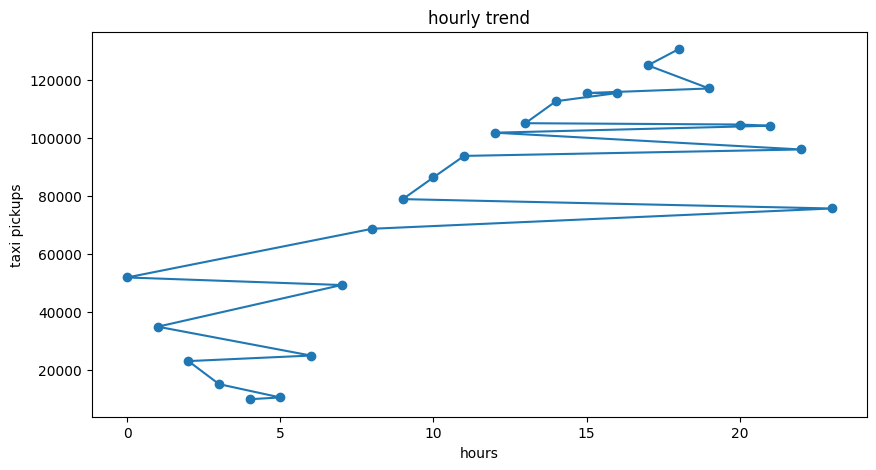

In [90]:
plt.figure(figsize=(10,5))
hourly_trend.plot(kind='line', marker='o')
plt.xlabel('hours')
plt.ylabel('taxi pickups')
plt.title('hourly trend')
plt.show()

In [91]:
# Find and show the daily trends in taxi pickups (days of the week)

df_cleaned['daily_trend'] = df_cleaned['tpep_pickup_datetime'].dt.day_name()
daily_trend = df_cleaned['daily_trend'].value_counts()
daily_trend

,count
daily_trend,
Thursday,289850
Wednesday,284563
Friday,274452
Tuesday,269016
Saturday,268423
Monday,232012
Sunday,231806


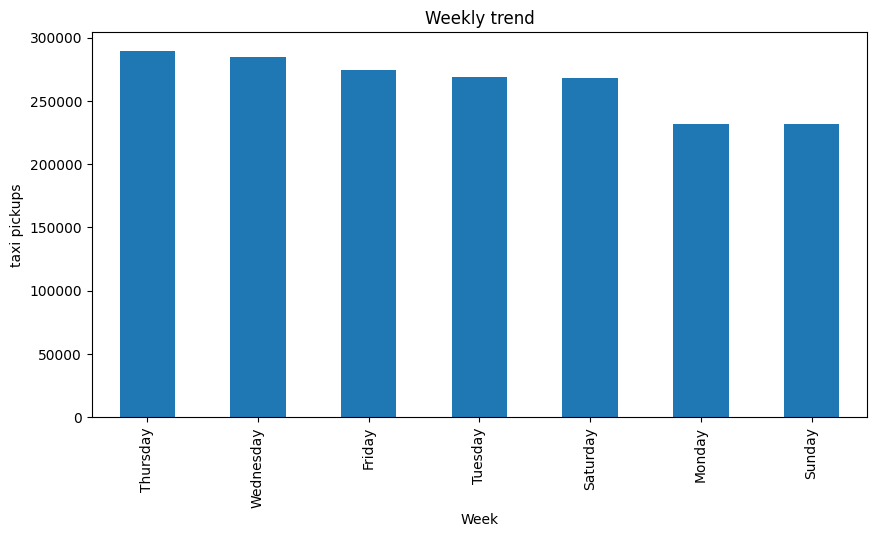

In [92]:
plt.figure(figsize=(10,5))
daily_trend.plot(kind='bar')
plt.xlabel('Week')
plt.ylabel('taxi pickups')
plt.title('Weekly trend')
plt.show()

In [93]:
# Show the monthly trends in pickups

df_cleaned['Monthly_trend'] = df_cleaned['tpep_pickup_datetime'].dt.month_name()
Monthly_trend = df_cleaned['Monthly_trend'].value_counts()
Monthly_trend

,count
Monthly_trend,
May,170605
October,168352
March,165790
June,160459
November,160318
April,159934
December,159804
January,149782
February,141935


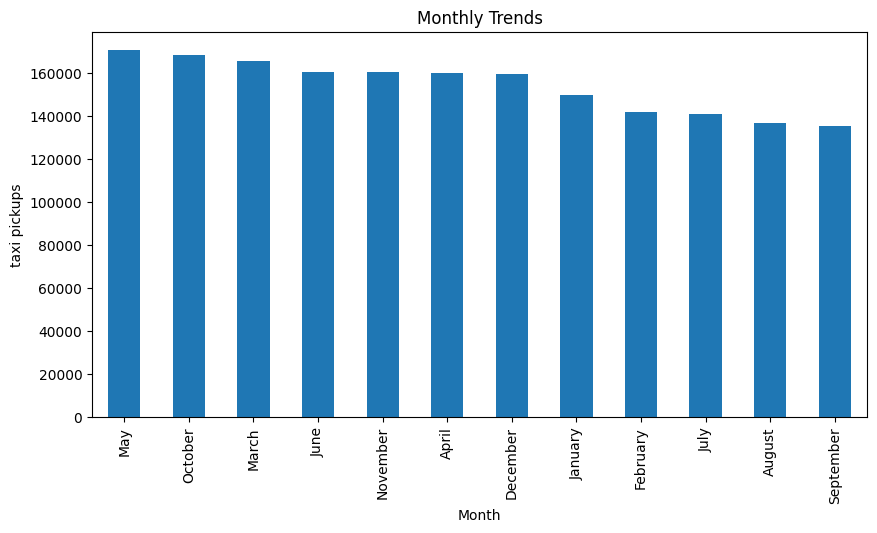

In [94]:
plt.figure(figsize=(10,5))
Monthly_trend.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('taxi pickups')
plt.title('Monthly Trends')
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [95]:
# Analyse the above parameters

financial_parameters = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

for col in financial_parameters:
    zero_values = (df[col] == 0).sum()
    negative_values = (df[col] < 0).sum()
    print(f"Column: {col}")
    print(f"Number of zero_values: {zero_values}")
    print(f"Number of negative_values: {negative_values}")
    print()

Column: fare_amount
Number of zero_values: 625
Number of negative_values: 18942

Column: tip_amount
Number of zero_values: 453731
Number of negative_values: 85

Column: total_amount
Number of zero_values: 297
Number of negative_values: 18702

Column: trip_distance
Number of zero_values: 38806
Number of negative_values: 0



Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these? - No

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [96]:
# Create a df with non zero entries for the selected parameters.

financial_parameters = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
non_zero_values = df_cleaned[(df_cleaned[financial_parameters] > 0).all(axis=1)]
non_zero_values

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,hour,daily_trend,Monthly_trend
0,2023-01-18 00:32:54,2023-01-18 00:45:04,1.0,3.21,1.0,N,158,161,1,15.6,...,0.5,4.12,0.00,1.0,24.72,2.5,0.00,0,Wednesday,January
1,2023-01-15 00:17:26,2023-01-15 00:27:34,1.0,1.50,1.0,N,144,107,1,10.7,...,0.5,3.95,0.00,1.0,19.65,2.5,0.00,0,Sunday,January
2,2023-01-28 00:46:31,2023-01-28 00:53:58,1.0,1.30,1.0,N,249,90,1,9.3,...,0.5,1.00,0.00,1.0,15.30,2.5,0.00,0,Saturday,January
3,2023-01-28 00:57:26,2023-01-28 01:02:03,1.0,1.10,1.0,N,237,48,1,7.2,...,0.5,3.65,0.00,1.0,15.85,2.5,0.00,0,Saturday,January
5,2023-01-18 00:03:58,2023-01-18 00:38:08,1.0,17.31,2.0,N,132,230,1,70.0,...,0.5,0.01,6.55,1.0,81.81,2.5,1.25,0,Wednesday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915498,2023-12-07 23:22:23,2023-12-07 23:42:49,1.0,7.49,1.0,N,87,263,1,31.0,...,0.5,7.20,0.00,1.0,43.20,2.5,0.00,23,Thursday,December
1915499,2023-12-30 23:28:20,2023-12-30 23:35:00,1.0,0.80,1.0,N,211,148,1,7.2,...,0.5,2.45,0.00,1.0,14.65,2.5,0.00,23,Saturday,December
1915500,2023-12-06 23:00:02,2023-12-06 23:07:01,1.0,1.06,1.0,N,100,170,1,8.6,...,0.5,2.72,0.00,1.0,16.32,2.5,0.00,23,Wednesday,December
1915501,2023-12-07 23:45:27,2023-12-07 23:55:33,1.0,1.52,1.0,N,113,164,1,11.4,...,0.5,3.28,0.00,1.0,19.68,2.5,0.00,23,Thursday,December


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [97]:
# Group data by month and analyse monthly revenue

monthly_revenue = df_cleaned.groupby('Monthly_trend')['total_amount'].sum().reset_index()
monthly_revenue

,Monthly_trend,total_amount
0,April,4555511.84
1,August,3938500.55
2,December,4612883.81
3,February,3849160.74
4,January,4067758.55
5,July,4056543.62
6,June,4654002.62
7,March,4629579.74
8,May,4959070.09
9,November,4637900.15


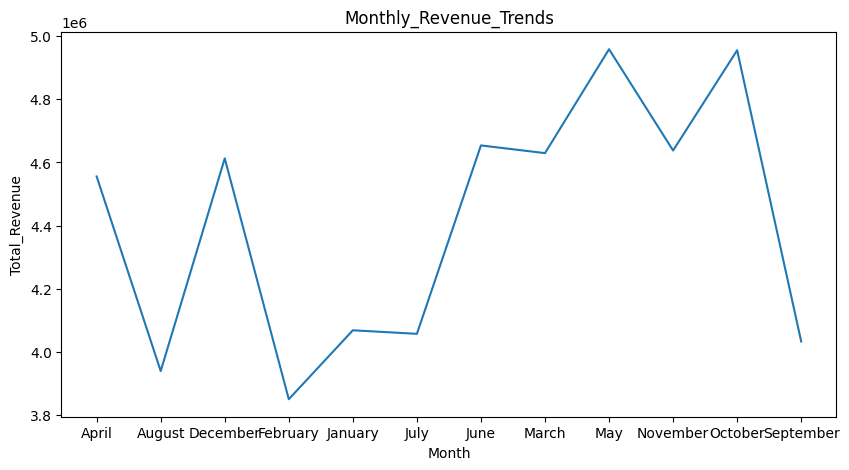

In [98]:
plt.figure(figsize=(10,5))
plt.plot(monthly_revenue['Monthly_trend'].astype(str), monthly_revenue['total_amount'])
plt.xlabel('Month')
plt.ylabel('Total_Revenue')
plt.title('Monthly_Revenue_Trends')
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [99]:
# Calculate proportion of each quarter

df_cleaned['quarterly_trend'] = df_cleaned['tpep_pickup_datetime'].dt.to_period('Q')
quarterly_revenue = df_cleaned.groupby('quarterly_trend')['total_amount'].sum().reset_index()

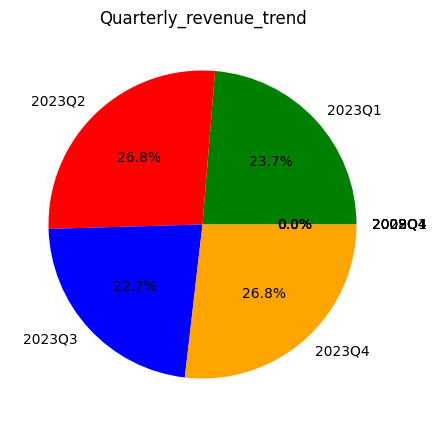

In [100]:
plt.figure(figsize=(5,5))
plt.pie(quarterly_revenue['total_amount'], labels=quarterly_revenue['quarterly_trend'], autopct='%1.1f%%', colors=['green', 'red', 'blue', 'orange'])
plt.title('Quarterly_revenue_trend')
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

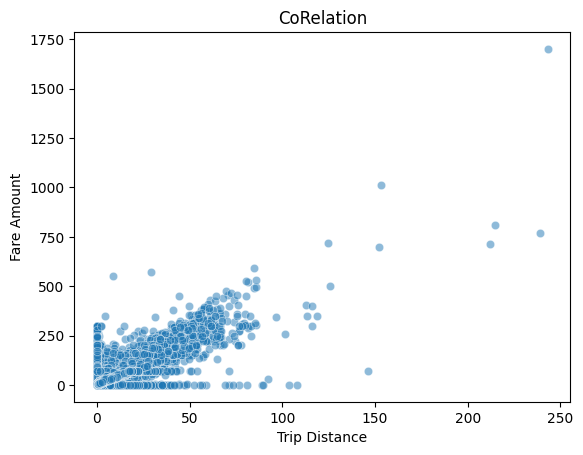

In [101]:
# Show how trip fare is affected by distance

plt.figure
sns.scatterplot(x=df_cleaned['trip_distance'], y=df_cleaned['fare_amount'], alpha=0.5)

plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.title('CoRelation')
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

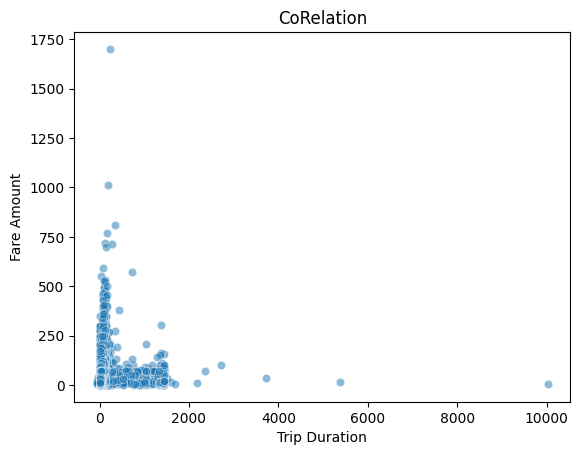

In [102]:
# Show relationship between fare and trip duration

df_cleaned['trip_duration'] = (df_cleaned['tpep_dropoff_datetime'] - df_cleaned['tpep_pickup_datetime']).dt.total_seconds() / 60

plt.figure
sns.scatterplot(x=df_cleaned['trip_duration'], y=df_cleaned['fare_amount'], alpha=0.5)

plt.xlabel('Trip Duration')
plt.ylabel('Fare Amount')
plt.title('CoRelation')
plt.show()

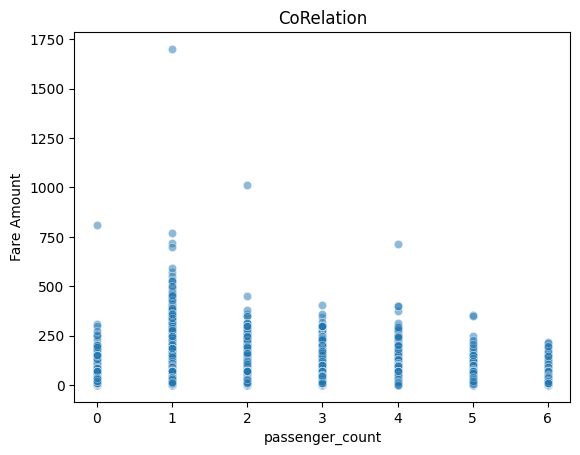

In [103]:
# Show relationship between fare and number of passengers

plt.figure
sns.scatterplot(x=df_cleaned['passenger_count'], y=df_cleaned['fare_amount'], alpha=0.5)

plt.xlabel('passenger_count')
plt.ylabel('Fare Amount')
plt.title('CoRelation')
plt.show()

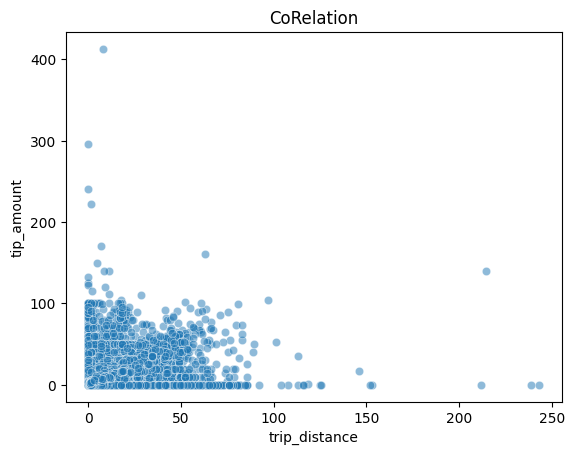

In [104]:
# Show relationship between tip and trip distance

plt.figure
sns.scatterplot(x=df_cleaned['trip_distance'], y=df_cleaned['tip_amount'], alpha=0.5)

plt.xlabel('trip_distance')
plt.ylabel('tip_amount')
plt.title('CoRelation')
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [105]:
# Analyse the distribution of different payment types (payment_type).

payment_type_mapping = {1: 'Credit Card', 2: 'Cash', 3: 'No charge', 4: 'Dispute', 5: 'Not given1', 0: 'Not given2'}
df_cleaned['payment_type'] = df_cleaned['payment_type'].map(payment_type_mapping)

payment_types = df_cleaned['payment_type'].value_counts()
payment_types

,count
payment_type,
Credit Card,1492867
Cash,320496
Dispute,24750
No charge,12008
Not given1,1


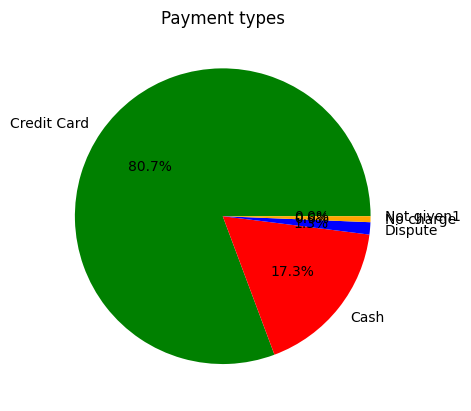

In [106]:
plt.figure
plt.pie(payment_types, labels=payment_types.index, autopct='%1.1f%%', colors=['green', 'red', 'blue', 'orange'])
plt.title('Payment types')
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [107]:
# !pip install geopandas
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [108]:
# import geopandas as gpd
import geopandas as gpd



# Read the shapefile using geopandas
zones = gpd.read_file('/content/taxi_zones/taxi_zones.shp')  # read the .shp file using gpd
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

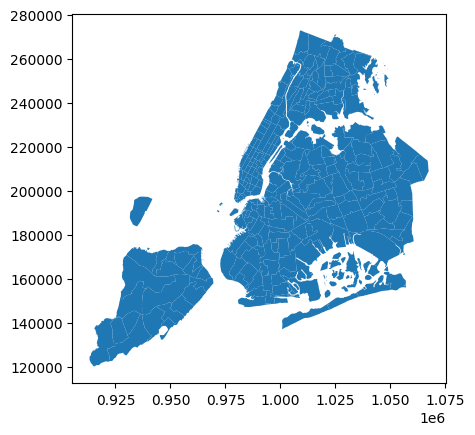

In [109]:
# print(zones.info())
print(zones.info())
# zones.plot()
zones.plot()


In [110]:
zones.columns

Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry'],
      dtype='object')

In [111]:
df_cleaned.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,hour,daily_trend,Monthly_trend,quarterly_trend,trip_duration
0,2023-01-18 00:32:54,2023-01-18 00:45:04,1.0,3.21,1.0,N,158,161,Credit Card,15.6,...,0.0,1.0,24.72,2.5,0.0,0,Wednesday,January,2023Q1,12.166667
1,2023-01-15 00:17:26,2023-01-15 00:27:34,1.0,1.50,1.0,N,144,107,Credit Card,10.7,...,0.0,1.0,19.65,2.5,0.0,0,Sunday,January,2023Q1,10.133333
2,2023-01-28 00:46:31,2023-01-28 00:53:58,1.0,1.30,1.0,N,249,90,Credit Card,9.3,...,0.0,1.0,15.30,2.5,0.0,0,Saturday,January,2023Q1,7.450000
3,2023-01-28 00:57:26,2023-01-28 01:02:03,1.0,1.10,1.0,N,237,48,Credit Card,7.2,...,0.0,1.0,15.85,2.5,0.0,0,Saturday,January,2023Q1,4.616667
4,2023-01-29 00:32:44,2023-01-29 00:42:06,2.0,0.99,1.0,N,148,113,Cash,10.0,...,0.0,1.0,15.00,2.5,0.0,0,Sunday,January,2023Q1,9.366667


Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.
-  No common columns to merge

In [112]:
# Merge zones and trip records using locationID and PULocationID

zones = df_cleaned.merge(zones, left_on="PULocationID", right_on="LocationID", how="left")
zones.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,...,Monthly_trend,quarterly_trend,trip_duration,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,2023-01-18 00:32:54,2023-01-18 00:45:04,1.0,3.21,1.0,N,158,161,Credit Card,15.6,...,January,2023Q1,12.166667,158.0,0.054810,0.000186,Meatpacking/West Village West,158.0,Manhattan,"POLYGON ((982091.02 209596.704, 982318.344 209..."
1,2023-01-15 00:17:26,2023-01-15 00:27:34,1.0,1.50,1.0,N,144,107,Credit Card,10.7,...,January,2023Q1,10.133333,144.0,0.027620,0.000047,Little Italy/NoLiTa,144.0,Manhattan,"POLYGON ((985411.76 200369.518, 985342.573 200..."
2,2023-01-28 00:46:31,2023-01-28 00:53:58,1.0,1.30,1.0,N,249,90,Credit Card,9.3,...,January,2023Q1,7.450000,249.0,0.036384,0.000072,West Village,249.0,Manhattan,"POLYGON ((983555.319 204876.901, 983469.158 20..."
3,2023-01-28 00:57:26,2023-01-28 01:02:03,1.0,1.10,1.0,N,237,48,Credit Card,7.2,...,January,2023Q1,4.616667,237.0,0.042213,0.000096,Upper East Side South,237.0,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21..."
4,2023-01-29 00:32:44,2023-01-29 00:42:06,2.0,0.99,1.0,N,148,113,Cash,10.0,...,January,2023Q1,9.366667,148.0,0.039131,0.000070,Lower East Side,148.0,Manhattan,"POLYGON ((988552.836 201677.665, 988387.669 20..."


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [113]:
# Group data by location and calculate the number of trips

total_trips = df_clean.groupby("PULocationID")["PULocationID"].count().reset_index(name="trip_count")
total_trips

,PULocationID,trip_count
0,1,252
1,2,1
2,3,34
3,4,2320
4,5,15
...,...,...
252,261,9764
253,262,25539
254,263,36517
255,264,18043


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [114]:
# Merge trip counts back to the zones GeoDataFrame

zones = zones.merge(total_trips, left_on='PULocationID', right_on='trip_count', how='left')



The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

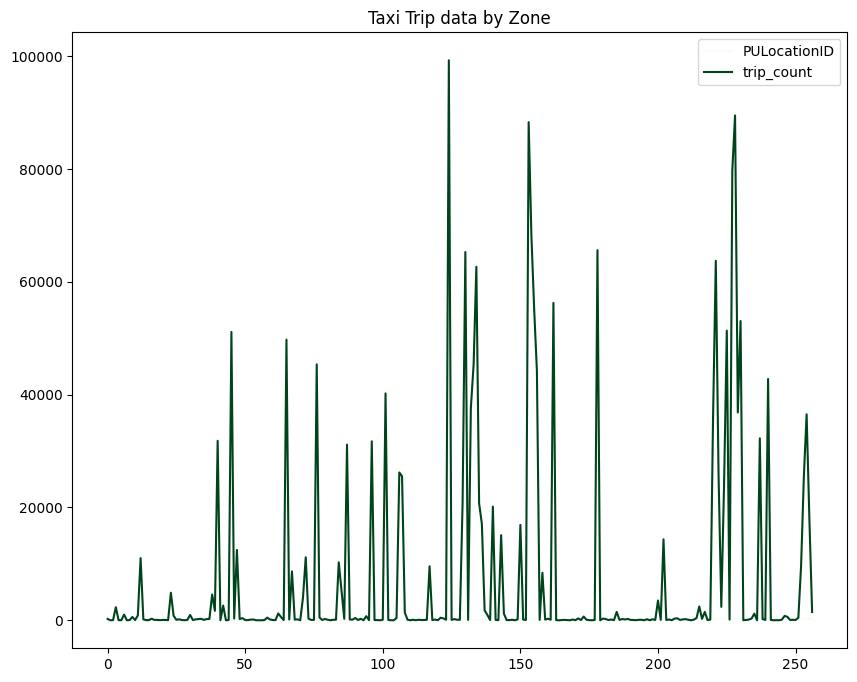

In [115]:
# Define figure and axis

fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title("Taxi Trip data by Zone")

# Plot the map and display it

total_trips.plot(column="trip_count", cmap="Greens", legend=True, ax=ax)
plt.show()


In [116]:
# can you try displaying the zones DF sorted by the number of trips?

total_trips = total_trips.sort_values(by="trip_count", ascending=False)
total_trips

,PULocationID,trip_count
124,132,99299
228,237,89513
153,161,88331
227,236,79784
154,162,68222
...,...,...
148,156,1
104,111,1
99,105,1
56,59,1


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


### General Analysis Findings

Based on the exploratory data analysis, the following patterns and trends were observed:

*   **Busiest Hours, Days, and Months:**
    *   **Hourly Trends:** The busiest hours for taxi pickups are consistently during the evening rush, particularly around 6 PM (18:00) and 5 PM (17:00), followed by 7 PM (19:00).
    *   **Daily Trends:** Weekdays, especially Thursday and Wednesday, show the highest number of taxi pickups. Weekends (Saturday and Sunday) tend to have slightly lower activity compared to peak weekdays.
    *   **Monthly Trends:** May, October, and March recorded the highest number of taxi pickups, indicating seasonal peaks in demand.

*   **Revenue Trends:**
    *   **Monthly Revenue:** The total revenue (`total_amount`) fluctuates throughout the year, with May and October showing the highest revenue generation, aligning with higher pickup counts. September and August appear to have lower revenue compared to other months.
    *   **Quarterly Revenue:** Q4 (October-December) and Q2 (April-June) contribute the most to the total annual revenue, suggesting these periods are crucial for taxi operations.

*   **Fare and Trip Characteristics:**
    *   **Trip Distance vs. Fare Amount:** There is a positive correlation between `trip_distance` and `fare_amount`. As trip distance increases, the fare amount generally increases, though there are variations, likely due to factors like traffic, specific routes, or additional charges.
    *   **Trip Duration vs. Fare Amount:** Similar to trip distance, `fare_amount` also shows a positive relationship with `trip_duration`. Longer trips in terms of time generally incur higher fares.
    *   **Passenger Count vs. Fare Amount:** There appears to be a weak or no direct strong correlation between `passenger_count` and `fare_amount`. The fare is primarily distance and time-based, not directly proportional to the number of passengers.

*   **Tip Amount and Trip Distance:**
    *   `tip_amount` generally increases with `trip_distance`. Longer trips often result in higher tip amounts, suggesting that customers might tip a percentage of the fare or round up for longer journeys.

*   **Busiest Zones:**
    *   The top pickup zones are consistently `PULocationID` 132 (LaGuardia Airport), 237 (Upper East Side South), and 161 (Midtown East), indicating these areas are major hubs for taxi demand.

## Summary:

### Data Analysis Key Findings

*   **Busiest Periods for Taxi Pickups:**
    *   **Hourly:** The peak hours for taxi pickups are 6 PM (18:00), 5 PM (17:00), and 7 PM (19:00), indicating a strong evening rush demand.
    *   **Daily:** Thursdays and Wednesdays record the highest number of pickups, with weekdays generally busier than weekends.
    *   **Monthly:** May, October, and March show the highest volume of taxi pickups.
*   **Revenue Performance:**
    *   **Monthly Revenue:** May and October generate the highest total revenue, aligning with the months showing high pickup counts.
    *   **Quarterly Revenue:** Q4 (October-December) and Q2 (April-June) are the strongest quarters for revenue contribution.
*   **Fare and Trip Characteristics:**
    *   `fare_amount` positively correlates with both `trip_distance` and `trip_duration`, meaning longer or time-consuming trips generally incur higher fares.
    *   There is a weak or no direct correlation between `passenger_count` and `fare_amount`, suggesting fares are primarily based on distance and time.
*   **Tip Amount Trends:**
    *   `tip_amount` generally increases with `trip_distance`, indicating customers tend to tip more for longer journeys.
*   **Top Pickup Zones:**
    *   The zones with the highest taxi demand are `PULocationID` 132 (LaGuardia Airport), 237 (Upper East Side South), and 161 (Midtown East).



#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [117]:
# Find routes which have the slowest speeds at different times of the day


df_cleaned["trip_duration_hr"] = df_cleaned["trip_duration"] / 3600
df_cleaned["speed_mph"] = df_cleaned["trip_distance"] / df_cleaned["trip_duration_hr"]
df_cleaned = df_cleaned[(df_cleaned["speed_mph"] > 1) & (df_cleaned["speed_mph"] < 100)]

df_cleaned["pickup_hour"] = pd.to_datetime(df_cleaned["tpep_pickup_datetime"]).dt.hour

def time_of_day(hour):
    if 6 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 16:
        return "Afternoon"
    elif 16 <= hour < 21:
        return "Evening"
    else:
        return "Night"

df_cleaned["time_of_day"] = df_cleaned["pickup_hour"].apply(time_of_day)

In [118]:
slow_routes = (df_cleaned.groupby(["PULocationID", "DOLocationID", "time_of_day"]).agg(avg_speed=("speed_mph", "mean"), trip_count=("speed_mph", "count")).reset_index())

In [119]:
slow_routes

,PULocationID,DOLocationID,time_of_day,avg_speed,trip_count
0,1,1,Evening,30.997089,2
1,3,170,Afternoon,16.744186,1
2,4,4,Night,53.348611,4
3,4,79,Evening,20.093023,1
4,4,80,Night,11.822984,1
...,...,...,...,...,...
2688,264,264,Morning,48.690263,8
2689,264,264,Night,51.782684,7
2690,265,67,Evening,8.503937,1
2691,265,265,Evening,80.000000,1


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [120]:
# Visualise the number of trips per hour and find the busiest hour

df_cleaned["tpep_pickup_datetime"] = pd.to_datetime(df_cleaned["tpep_pickup_datetime"])
df_cleaned["pickup_hour"] = df_cleaned["tpep_pickup_datetime"].dt.hour
hourly_trips = df_cleaned.groupby("pickup_hour")["pickup_hour"].count().reset_index(name="trip_count")
busiest_hour = hourly_trips.loc[hourly_trips["trip_count"].idxmax()]
busiest_hour

,16
pickup_hour,16
trip_count,547


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [121]:
# Scale up the number of trips
busiest_5_hours = hourly_trips.sort_values(by='trip_count', ascending=False).head(5)
print(busiest_5_hours)

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05
actual_trip_counts = busiest_5_hours['trip_count'] / sample_fraction
busiest_5_hours['actual_trip_count'] = actual_trip_counts
print("Top 5 busiest hours with estimated actual trip counts:")
print(busiest_5_hours)



    pickup_hour  trip_count
16           16         547
17           17         543
15           15         540
19           19         534
18           18         444
Top 5 busiest hours with estimated actual trip counts:
    pickup_hour  trip_count  actual_trip_count
16           16         547            10940.0
17           17         543            10860.0
15           15         540            10800.0
19           19         534            10680.0
18           18         444             8880.0


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [122]:
# Compare traffic trends for the week days and weekends

df_cleaned["tpep_pickup_datetime"] = pd.to_datetime(df_cleaned["tpep_pickup_datetime"])
df_cleaned["day_of_week"] = df_cleaned["tpep_pickup_datetime"].dt.dayofweek
df_cleaned["day_type"] = df_cleaned["day_of_week"].apply(lambda x: "Weekday" if x < 5 else "Weekend")

Compare_weekday_weekend = df_cleaned.groupby("day_type")["tpep_pickup_datetime"].count().reset_index()
Compare_weekday_weekend.columns = ["Day Type", "Trip Count"]
Compare_weekday_weekend

,Day Type,Trip Count
0,Weekday,4493
1,Weekend,1859


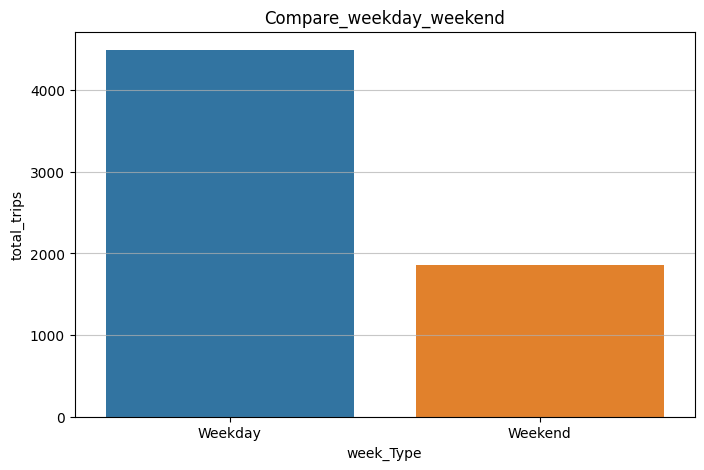

In [123]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Day Type", y="Trip Count", data=Compare_weekday_weekend, palette="tab10")

plt.xlabel("week_Type")
plt.ylabel("total_trips")
plt.title("Compare_weekday_weekend")
plt.grid(axis="y", linestyle="solid", alpha=0.7)
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [124]:
# Find top 10 pickup and dropoff zones
# Find top 10 pickup zones
top_10_pickup_zones = df_cleaned['PULocationID'].value_counts().head(10)
print("Top 10 Pickup Zones:")
print(top_10_pickup_zones)
# Find top 10 dropoff zones
top_10_dropoff_zones = df_cleaned['DOLocationID'].value_counts().head(10)
print("\nTop 10 Dropoff Zones:")
print(top_10_dropoff_zones)


Top 10 Pickup Zones:
PULocationID
186    488
161    421
230    373
162    289
237    274
132    269
48     258
68     251
170    241
100    239
Name: count, dtype: int64

Top 10 Dropoff Zones:
DOLocationID
230    717
161    560
100    357
48     311
162    215
170    214
237    200
164    194
186    184
163    174
Name: count, dtype: int64


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [128]:
import geopandas as gpd
import numpy as np

# Reload the original taxi zones shapefile
zones_gdf = gpd.read_file('/content/taxi_zones/taxi_zones.shp')

# 1. Calculate the number of pickups for each PULocationID
pickup_counts = df_cleaned.groupby('PULocationID').size().reset_index(name='pickup_count')
pickup_counts.rename(columns={'PULocationID': 'LocationID'}, inplace=True)

# 2. Calculate the number of dropoffs for each DOLocationID
dropoff_counts = df_cleaned.groupby('DOLocationID').size().reset_index(name='dropoff_count')
dropoff_counts.rename(columns={'DOLocationID': 'LocationID'}, inplace=True)

# 3. Merge pickup_counts and dropoff_counts with zones_gdf
zone_activity = zones_gdf.merge(pickup_counts, on='LocationID', how='left')
zone_activity = zone_activity.merge(dropoff_counts, on='LocationID', how='left')

# 4. Fill any NaN values with 0
zone_activity['pickup_count'].fillna(0, inplace=True)
zone_activity['dropoff_count'].fillna(0, inplace=True)

# Ensure counts are integers
zone_activity['pickup_count'] = zone_activity['pickup_count'].astype(int)
zone_activity['dropoff_count'] = zone_activity['dropoff_count'].astype(int)

# 5. Calculate the pickup_dropoff_ratio, handling division by zero
epsilon = 1e-6 # A small value to prevent division by zero
zone_activity['pickup_dropoff_ratio'] = zone_activity['pickup_count'] / (zone_activity['dropoff_count'] + epsilon)

# 6. Replace infinite values with NaN (for cases where dropoff_count was 0 and epsilon still leads to large numbers)
zone_activity['pickup_dropoff_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)

print("\nTop 10 zones with highest pickup/dropoff ratio:")
highest_ratio_zones = zone_activity.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10)
print(highest_ratio_zones[['zone', 'pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']])

print("\nTop 10 zones with lowest pickup/dropoff ratio (excluding zeros/NaNs where pickup count is also zero):\n(A ratio of 0 indicates either zero pickups or a very high number of dropoffs compared to pickups)")
lowest_ratio_zones = zone_activity[zone_activity['pickup_dropoff_ratio'] > 0].sort_values(by='pickup_dropoff_ratio', ascending=True).head(10)
print(lowest_ratio_zones[['zone', 'pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']])


Top 10 zones with highest pickup/dropoff ratio:
                                    zone  pickup_count  dropoff_count  \
31                             Bronxdale             3              0   
62                         Cypress Hills             3              0   
196                        Richmond Hill             2              0   
138                            Laurelton             2              0   
116                      Hammels/Arverne             2              0   
43                Charleston/Tottenville             1              0   
199  Riverdale/North Riverdale/Fieldston             1              0   
83     Eltingville/Annadale/Prince's Bay             1              0   
52                         College Point             1              0   
123                         Howard Beach             1              0   

     pickup_dropoff_ratio  
31              3000000.0  
62              3000000.0  
196             2000000.0  
138             2000000.0  
116    

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [129]:
# Filter for night hours (11 PM to 5 AM)
night_hours_df = df_cleaned[((df_cleaned['hour'] >= 23) | (df_cleaned['hour'] <= 5))]

# Find top 10 pickup zones during night hours
top_10_night_pickup_zones = night_hours_df['PULocationID'].value_counts().head(10)
print("\nTop 10 Pickup Zones during Night Hours (11 PM - 5 AM):")
print(top_10_night_pickup_zones)

# Find top 10 dropoff zones during night hours
top_10_night_dropoff_zones = night_hours_df['DOLocationID'].value_counts().head(10)
print("\nTop 10 Dropoff Zones during Night Hours (11 PM - 5 AM):")
print(top_10_night_dropoff_zones)


Top 10 Pickup Zones during Night Hours (11 PM - 5 AM):
PULocationID
79     46
230    40
249    39
48     37
132    34
186    28
148    28
144    24
68     23
164    21
Name: count, dtype: int64

Top 10 Dropoff Zones during Night Hours (11 PM - 5 AM):
DOLocationID
230    45
68     32
249    29
148    28
79     26
170    22
132    21
164    21
48     19
186    19
Name: count, dtype: int64


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

Revenue Share by Time Category:
  time_category  total_amount  revenue_share
0       Daytime     100348.06      65.316238
1     Nighttime      53286.11      34.683762


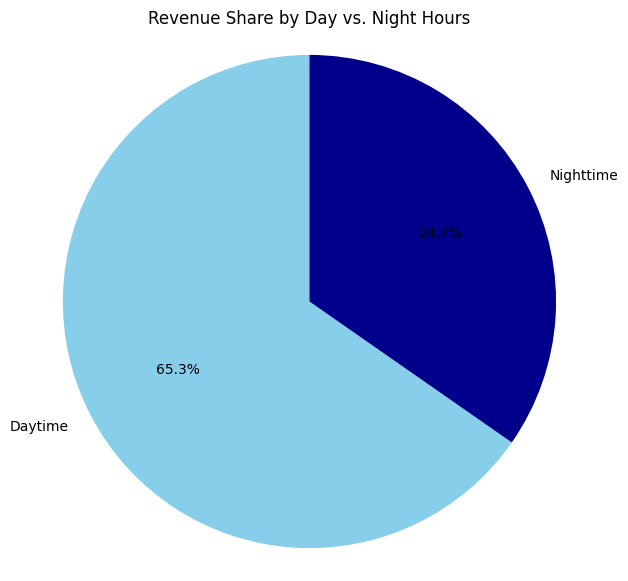

In [130]:
# Calculate the revenue share for night-time and day-time hours

def time_of_day_category(hour):
    if 6 <= hour < 18:  # Daytime: 6 AM to 5:59 PM
        return "Daytime"
    else:  # Nighttime: 6 PM to 5:59 AM (including 23, 0, 1, 2, 3, 4, 5)
        return "Nighttime"

df_cleaned['time_category'] = df_cleaned['hour'].apply(time_of_day_category)

revenue_by_time_category = df_cleaned.groupby('time_category')['total_amount'].sum().reset_index()
total_revenue = df_cleaned['total_amount'].sum()
revenue_by_time_category['revenue_share'] = (revenue_by_time_category['total_amount'] / total_revenue) * 100

print("Revenue Share by Time Category:")
print(revenue_by_time_category)

plt.figure(figsize=(7, 7))
plt.pie(revenue_by_time_category['revenue_share'], labels=revenue_by_time_category['time_category'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'darkblue'])
plt.title('Revenue Share by Day vs. Night Hours')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [131]:
# Analyse the fare per mile per passenger for different passenger counts

# Avoid division by zero for trip_distance and passenger_count
df_cleaned['trip_distance_safe'] = df_cleaned['trip_distance'].replace(0, np.nan)
df_cleaned['passenger_count_safe'] = df_cleaned['passenger_count'].replace(0, np.nan)

# Calculate fare per mile
df_cleaned['fare_per_mile'] = df_cleaned['fare_amount'] / df_cleaned['trip_distance_safe']

# Calculate fare per mile per passenger
df_cleaned['fare_per_mile_per_passenger'] = df_cleaned['fare_per_mile'] / df_cleaned['passenger_count_safe']

# Group by passenger_count and calculate the average fare per mile per passenger
average_fare_per_mile_per_passenger = df_cleaned.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()

print("Average Fare per Mile per Passenger for different Passenger Counts:")
print(average_fare_per_mile_per_passenger)

Average Fare per Mile per Passenger for different Passenger Counts:
   passenger_count  fare_per_mile_per_passenger
0              0.0                          NaN
1              1.0                   168.084344
2              2.0                   118.400509
3              3.0                   102.919064
4              4.0                   118.915843
5              5.0                     6.108371
6              6.0                     9.829733


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week


Average Fare per Mile by Hour of the Day:
    hour  fare_per_mile
0      0     198.517424
1      1     206.286330
2      2      70.993490
3      3     245.299281
4      4     408.081161
5      5     886.696040
6      6     342.034653
7      7     403.124751
8      8     239.143417
9      9     171.802424
10    10     226.689415
11    11     124.168330
12    12     128.033665
13    13      97.514999
14    14      97.205704
15    15     213.437501
16    16     234.097871
17    17     163.676916
18    18     167.996400
19    19     186.511034
20    20     176.516124
21    21     309.391871
22    22     100.873796
23    23     361.789907

Average Fare per Mile by Day of the Week:
  daily_trend  fare_per_mile
0      Friday     227.774753
1      Monday     201.611850
2    Saturday     163.182969
3      Sunday     236.535228
4    Thursday     181.261386
5     Tuesday     191.055515
6   Wednesday     149.175302


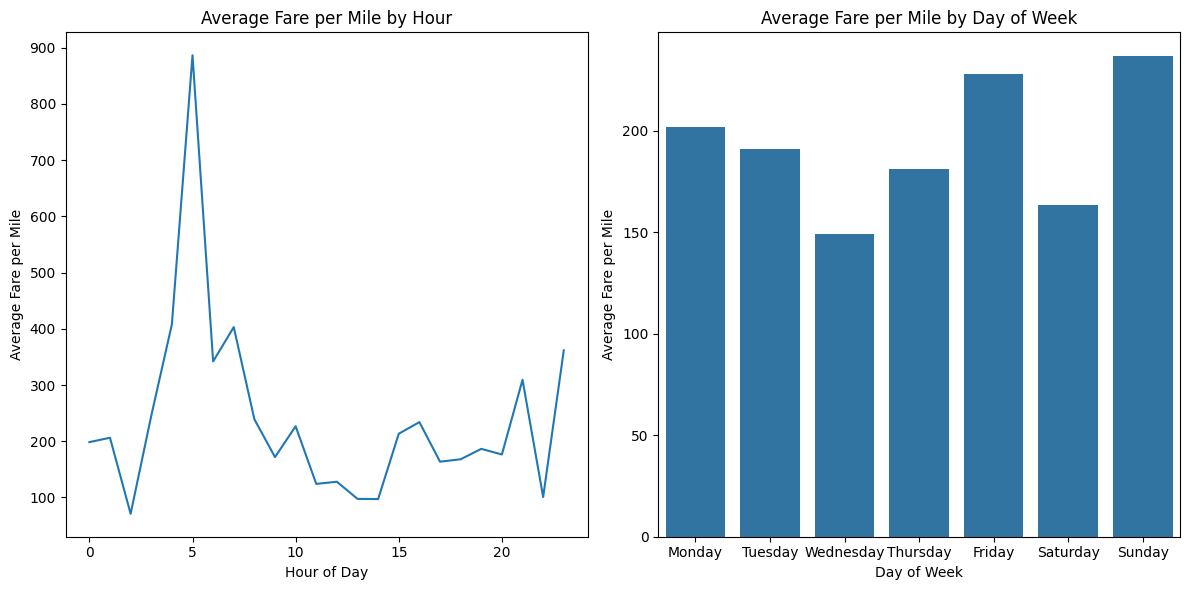

In [132]:
# Compare the average fare per mile for different days and for different times of the day

# Ensure 'trip_distance_safe' and 'fare_amount' are available (created in previous step)
# Calculate average fare per mile by hour of the day
average_fare_per_mile_hourly = df_cleaned.groupby('hour')['fare_per_mile'].mean().reset_index()
print("\nAverage Fare per Mile by Hour of the Day:")
print(average_fare_per_mile_hourly)

# Calculate average fare per mile by day of the week
average_fare_per_mile_daily = df_cleaned.groupby('daily_trend')['fare_per_mile'].mean().reset_index()
print("\nAverage Fare per Mile by Day of the Week:")
print(average_fare_per_mile_daily)

# Plotting for visualization (optional but good for analysis)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.lineplot(x='hour', y='fare_per_mile', data=average_fare_per_mile_hourly)
plt.title('Average Fare per Mile by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Fare per Mile')

plt.subplot(1, 2, 2)
sns.barplot(x='daily_trend', y='fare_per_mile', data=average_fare_per_mile_daily, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Average Fare per Mile by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Fare per Mile')

plt.tight_layout()
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

Average Fare per Mile by Vendor and Hour of the Day:
    VendorID  hour  fare_per_mile
0          1     0       6.660351
1          1     1       6.775296
2          1     2       6.621365
3          1     3       6.689960
4          1     4       7.340049
5          1     5       6.677471
6          1     6       6.876311
7          1     7       7.262159
8          1     8       8.016312
9          1     9       8.348247
10         1    10       8.405434
11         1    11       8.702792
12         1    12       8.890682
13         1    13       8.897975
14         1    14       8.654121
15         1    15       8.709098
16         1    16       8.809963
17         1    17       8.697073
18         1    18       8.512348
19         1    19       8.069373
20         1    20       7.454513
21         1    21       7.348388
22         1    22       7.042406
23         1    23       6.963180
24         2     0      12.036165
25         2     1       9.875653
26         2     2      11.59

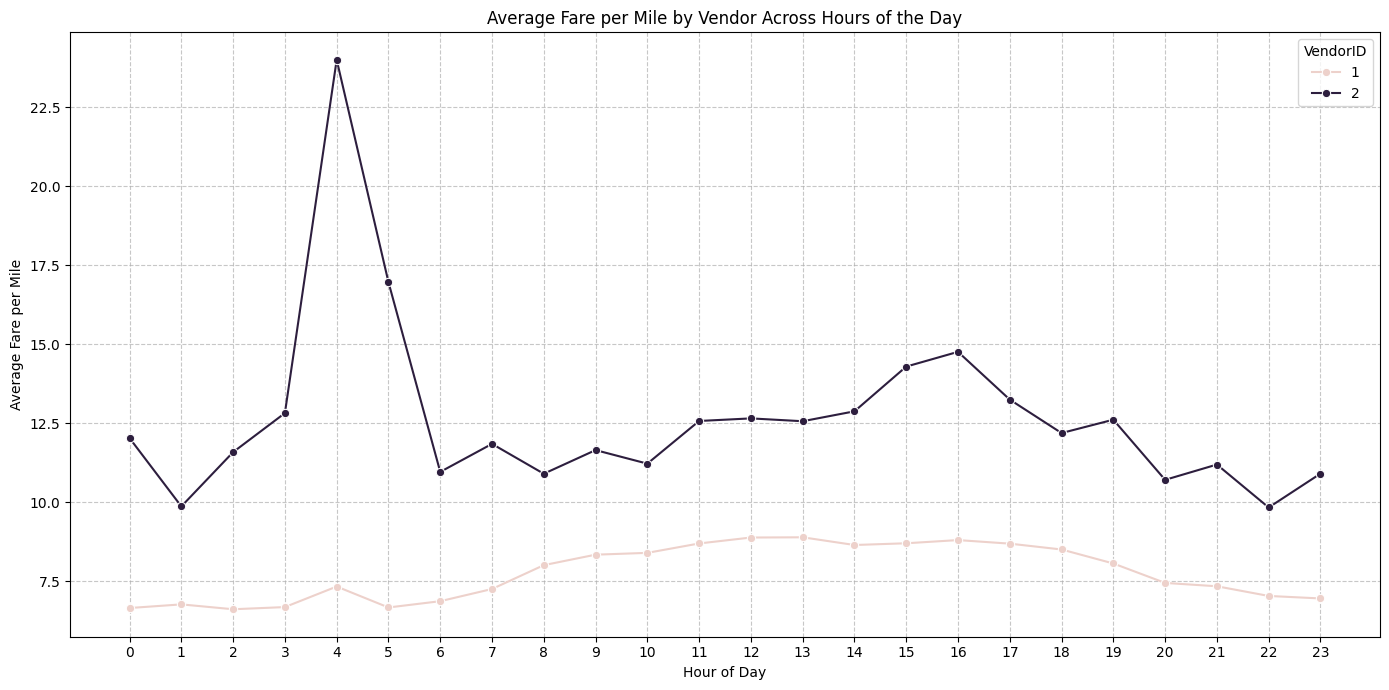

In [133]:
# Compare fare per mile for different vendors
# Create a copy of the original df (which contains VendorID) to apply cleaning for this specific analysis
df_vendor_analysis = df.copy()

# --- Reapply essential cleaning steps to df_vendor_analysis ---

# Combine 'Airport_fee' and 'airport_fee' (if they exist and are different)
if 'Airport_fee' in df_vendor_analysis.columns and 'airport_fee' in df_vendor_analysis.columns:
    df_vendor_analysis['airport_fee'] = df_vendor_analysis['airport_fee'].combine_first(df_vendor_analysis['Airport_fee'])
    df_vendor_analysis.drop(columns=['Airport_fee'], inplace=True)

# Fix negative monetary values
monetary_cols = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']
for col in monetary_cols:
    if col in df_vendor_analysis.columns:
        df_vendor_analysis.loc[df_vendor_analysis[col] < 0, col] = 0

# Handle missing values (using mode/median as done previously)
# Note: This is a simplified imputation based on previous cells; ideally, this would be a more robust pipeline.
if 'passenger_count' in df_vendor_analysis.columns:
    df_vendor_analysis['passenger_count'].fillna(df_vendor_analysis['passenger_count'].mode()[0], inplace=True)
if 'RatecodeID' in df_vendor_analysis.columns:
    df_vendor_analysis['RatecodeID'].fillna(df_vendor_analysis['RatecodeID'].median(), inplace=True)
if 'congestion_surcharge' in df_vendor_analysis.columns:
    df_vendor_analysis['congestion_surcharge'].fillna(df_vendor_analysis['congestion_surcharge'].mode()[0], inplace=True)
if 'store_and_fwd_flag' in df_vendor_analysis.columns:
    df_vendor_analysis['store_and_fwd_flag'].fillna(df_vendor_analysis['store_and_fwd_flag'].mode()[0], inplace=True)
if 'airport_fee' in df_vendor_analysis.columns:
    df_vendor_analysis['airport_fee'].fillna(df_vendor_analysis['airport_fee'].mean(), inplace=True)

# Outlier handling (based on previous steps)
df_vendor_analysis = df_vendor_analysis[df_vendor_analysis['passenger_count'] <= 6]
df_vendor_analysis = df_vendor_analysis[~((df_vendor_analysis['trip_distance'] < 1) & (df_vendor_analysis['fare_amount'] > 300))]
df_vendor_analysis = df_vendor_analysis[~((df_vendor_analysis['trip_distance'] == 0) & (df_vendor_analysis['fare_amount'] == 0) & (df_vendor_analysis['PULocationID'] != df_vendor_analysis['DOLocationID']))]
df_vendor_analysis = df_vendor_analysis[df_vendor_analysis['trip_distance'] <= 250]
df_vendor_analysis = df_vendor_analysis[df_vendor_analysis['payment_type'] != 0] # Assuming 'payment_type' is still numeric before mapping

# Re-create derived columns needed for fare_per_mile
df_vendor_analysis['tpep_pickup_datetime'] = pd.to_datetime(df_vendor_analysis['tpep_pickup_datetime'])
df_vendor_analysis['hour'] = df_vendor_analysis['tpep_pickup_datetime'].dt.hour
df_vendor_analysis['trip_distance_safe'] = df_vendor_analysis['trip_distance'].replace(0, np.nan)

# Calculate fare per mile
df_vendor_analysis['fare_per_mile'] = df_vendor_analysis['fare_amount'] / df_vendor_analysis['trip_distance_safe']

# Compare fare per mile for different vendors for different hours of the day
# Ensure 'VendorID' is treated as categorical for grouping if needed, or numeric if values are already 1 and 2
fare_per_mile_by_vendor_hourly = df_vendor_analysis.groupby(['VendorID', 'hour'])['fare_per_mile'].mean().reset_index()

print("Average Fare per Mile by Vendor and Hour of the Day:")
print(fare_per_mile_by_vendor_hourly)

# Visualize the comparison
plt.figure(figsize=(14, 7))
sns.lineplot(data=fare_per_mile_by_vendor_hourly, x='hour', y='fare_per_mile', hue='VendorID', marker='o')
plt.title('Average Fare per Mile by Vendor Across Hours of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Fare per Mile')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='VendorID')
plt.tight_layout()
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [134]:
# Defining distance tiers
# Define a function to categorize trip distance into tiers
def categorize_distance(distance):
    if distance <= 2:
        return '0-2 miles'
    elif 2 < distance <= 5:
        return '2-5 miles'
    else:
        return '5+ miles'

# Apply the function to create the 'distance_tier' column in df_vendor_analysis
df_vendor_analysis['distance_tier'] = df_vendor_analysis['trip_distance'].apply(categorize_distance)

# Calculate the mean fare_per_mile for each VendorID and distance_tier
tiered_fare_per_mile = df_vendor_analysis.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()

print("Average Fare per Mile by Vendor and Distance Tier:")
print(tiered_fare_per_mile)


Average Fare per Mile by Vendor and Distance Tier:
   VendorID distance_tier  fare_per_mile
0         1     0-2 miles       9.932235
1         1     2-5 miles       6.392026
2         1      5+ miles       4.422839
3         2     0-2 miles      17.675221
4         2     2-5 miles       6.496464
5         2      5+ miles       4.447719


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

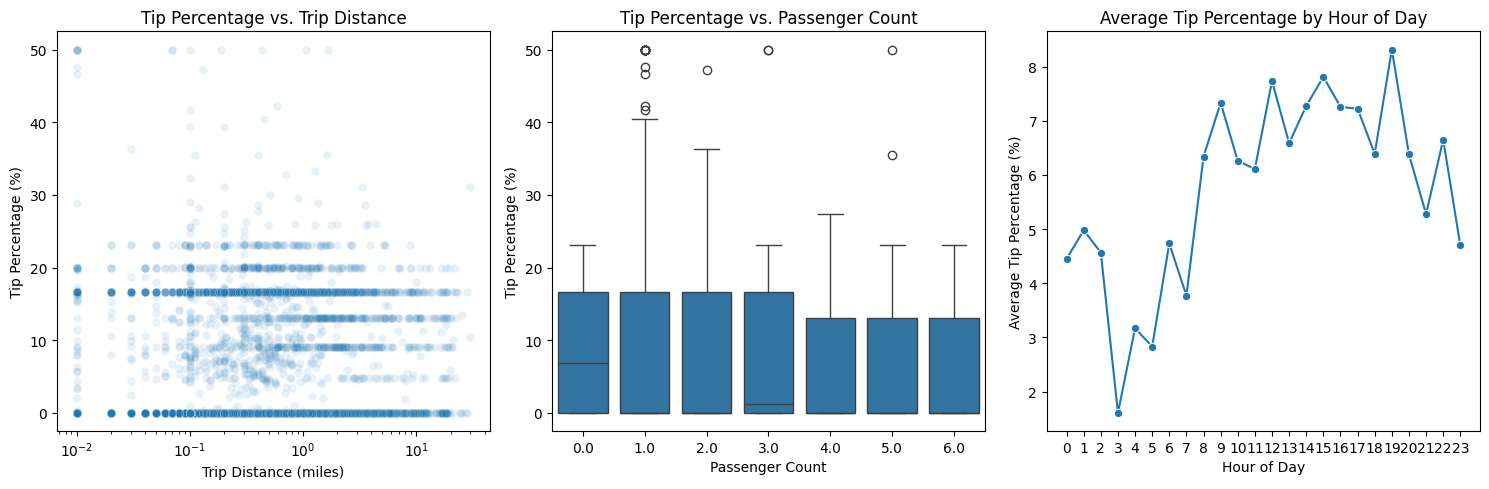


Average Tip Percentage by Passenger Count:
   passenger_count  tip_percentage
0              0.0        8.289073
1              1.0        6.596297
2              2.0        6.979415
3              3.0        7.852340
4              4.0        5.381485
5              5.0        6.746218
6              6.0        6.116392

Average Tip Percentage by Hour of Day:
    hour  tip_percentage
0      0        4.450758
1      1        4.978855
2      2        4.567379
3      3        1.604579
4      4        3.168346
5      5        2.830304
6      6        4.734719
7      7        3.770095
8      8        6.337998
9      9        7.330783
10    10        6.258843
11    11        6.111523
12    12        7.733858
13    13        6.587106
14    14        7.276071
15    15        7.810841
16    16        7.257948
17    17        7.221726
18    18        6.390737
19    19        8.316533
20    20        6.379022
21    21        5.276365
22    22        6.654175
23    23        4.697552


In [135]:
# Analyze tip percentages based on distances, passenger counts and pickup times

# Calculate tip percentage, handling division by zero
df_cleaned['tip_percentage'] = np.where(
    df_cleaned['total_amount'] > 0,
    (df_cleaned['tip_amount'] / df_cleaned['total_amount']) * 100,
    0
)

# Trim extreme tip percentages for better visualization (e.g., cap at 50%)
df_cleaned['tip_percentage'] = df_cleaned['tip_percentage'].clip(upper=50)

# Analysis by Trip Distance
# Bin trip distances for better visualization if needed, or use scatter plot directly
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='trip_distance', y='tip_percentage', data=df_cleaned, alpha=0.1)
plt.title('Tip Percentage vs. Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Percentage (%)')
plt.xscale('log') # Use log scale for distance to handle wide range

# Analysis by Passenger Counts
plt.subplot(1, 3, 2)
sns.boxplot(x='passenger_count', y='tip_percentage', data=df_cleaned)
plt.title('Tip Percentage vs. Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Tip Percentage (%)')

# Analysis by Time of Pickup (Hour)
plt.subplot(1, 3, 3)
sns.lineplot(x='hour', y='tip_percentage', data=df_cleaned.groupby('hour')['tip_percentage'].mean().reset_index(), marker='o')
plt.title('Average Tip Percentage by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Tip Percentage (%)')
plt.xticks(range(0, 24))

plt.tight_layout()
plt.show()

print("\nAverage Tip Percentage by Passenger Count:")
print(df_cleaned.groupby('passenger_count')['tip_percentage'].mean().reset_index())

print("\nAverage Tip Percentage by Hour of Day:")
print(df_cleaned.groupby('hour')['tip_percentage'].mean().reset_index())

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours


Descriptive statistics for trips with tip percentage < 10%:
       trip_distance  fare_amount  passenger_count         hour
count    4099.000000  4099.000000      4099.000000  4099.000000
mean        1.263135    16.206460         1.452061    14.122957
std         2.954263    18.333523         1.029498     5.593214
min         0.010000     0.000000         0.000000     0.000000
25%         0.040000     4.400000         1.000000    11.000000
50%         0.300000    10.700000         1.000000    15.000000
75%         0.930000    19.800000         1.000000    18.000000
max        27.920000   237.900000         6.000000    23.000000

Descriptive statistics for trips with tip percentage > 25%:
       trip_distance  fare_amount  passenger_count       hour
count      55.000000    55.000000        55.000000  55.000000
mean        1.265818    14.267273         1.363636  13.127273
std         4.080389    23.404835         0.930226   6.274742
min         0.010000     3.000000         1.000000   0

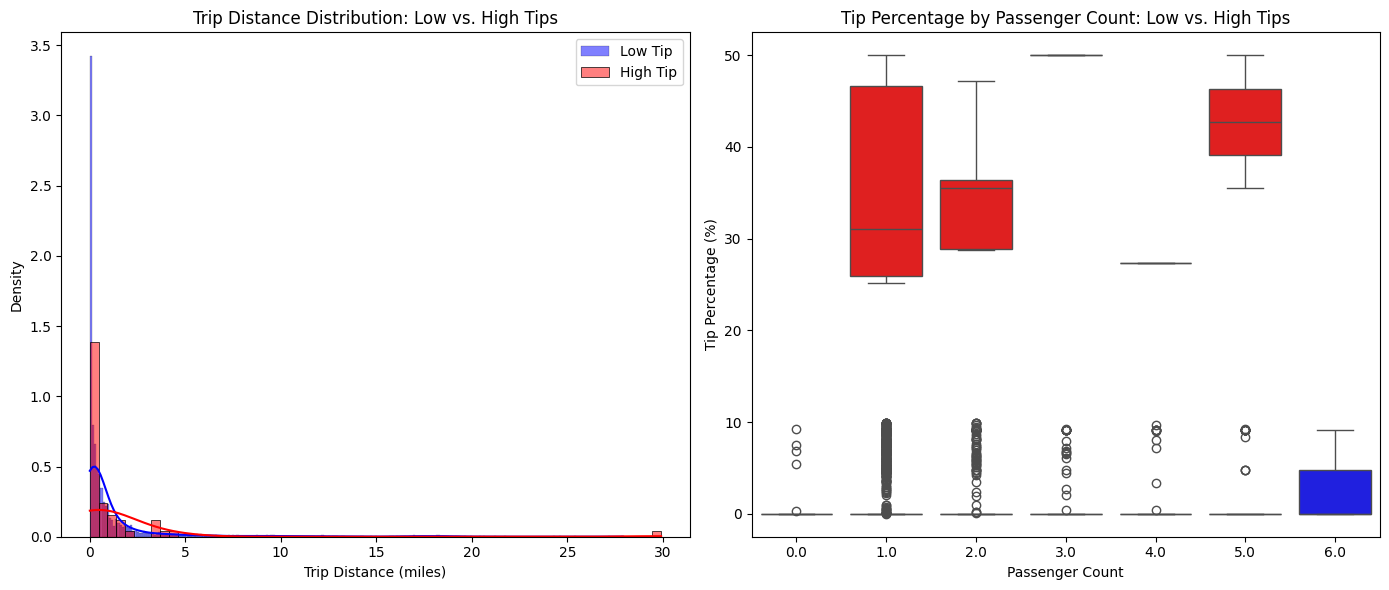

In [136]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

# Filter for low tip percentage trips
low_tip_trips = df_cleaned[df_cleaned['tip_percentage'] < 10]

# Filter for high tip percentage trips
high_tip_trips = df_cleaned[df_cleaned['tip_percentage'] > 25]

print("\nDescriptive statistics for trips with tip percentage < 10%:")
print(low_tip_trips[['trip_distance', 'fare_amount', 'passenger_count', 'hour']].describe())

print("\nDescriptive statistics for trips with tip percentage > 25%:")
print(high_tip_trips[['trip_distance', 'fare_amount', 'passenger_count', 'hour']].describe())

# Optional: Visualize distributions
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(low_tip_trips['trip_distance'], color='blue', label='Low Tip', kde=True, stat='density', alpha=0.5)
sns.histplot(high_tip_trips['trip_distance'], color='red', label='High Tip', kde=True, stat='density', alpha=0.5)
plt.title('Trip Distance Distribution: Low vs. High Tips')
plt.xlabel('Trip Distance (miles)')
plt.legend()

plt.subplot(1, 2, 2)
sns.boxplot(x='passenger_count', y='tip_percentage', data=df_cleaned[df_cleaned['tip_percentage'] < 10], color='blue', ax=plt.gca(), whis=2.0)
sns.boxplot(x='passenger_count', y='tip_percentage', data=df_cleaned[df_cleaned['tip_percentage'] > 25], color='red', ax=plt.gca(), whis=2.0)
plt.title('Tip Percentage by Passenger Count: Low vs. High Tips')
plt.xlabel('Passenger Count')
plt.ylabel('Tip Percentage (%)')
plt.tight_layout()
plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.


Average Passenger Count by Hour of Day:
    hour  passenger_count
0      0         1.454545
1      1         1.705426
2      2         1.419355
3      3         1.860000
4      4         1.302326
5      5         1.296296
6      6         1.266667
7      7         1.304878
8      8         1.422360
9      9         1.273196
10    10         1.410169
11    11         1.439169
12    12         1.474537
13    13         1.482270
14    14         1.450882
15    15         1.416667
16    16         1.418647
17    17         1.491713
18    18         1.452703
19    19         1.355805
20    20         1.514706
21    21         1.613333
22    22         1.413953
23    23         1.482234

Average Passenger Count by Day of Week:
  daily_trend  passenger_count
0      Friday         1.434354
1      Monday         1.409020
2    Saturday         1.568733
3      Sunday         1.587131
4    Thursday         1.398305
5     Tuesday         1.404281
6   Wednesday         1.340573


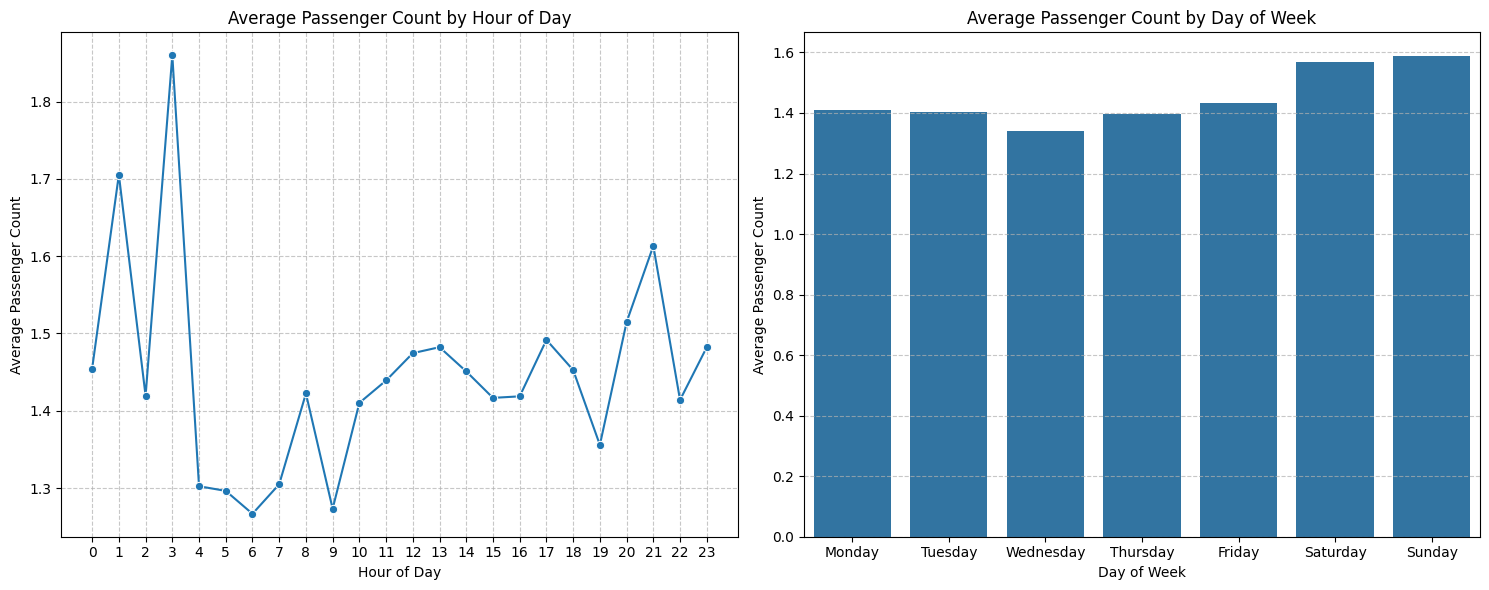

In [137]:
# See how passenger count varies across hours and days

# Average passenger count by hour of day
average_pass_count_hourly = df_cleaned.groupby('hour')['passenger_count'].mean().reset_index()

# Average passenger count by day of week
average_pass_count_daily = df_cleaned.groupby('daily_trend')['passenger_count'].mean().reset_index()

print("\nAverage Passenger Count by Hour of Day:")
print(average_pass_count_hourly)

print("\nAverage Passenger Count by Day of Week:")
print(average_pass_count_daily)

# Plotting for visualization
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.lineplot(x='hour', y='passenger_count', data=average_pass_count_hourly, marker='o')
plt.title('Average Passenger Count by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Passenger Count')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
sns.barplot(x='daily_trend', y='passenger_count', data=average_pass_count_daily, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Average Passenger Count by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Passenger Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [138]:
# How does passenger count vary across zones
average_pass_count_by_zone = df_cleaned.groupby('PULocationID')['passenger_count'].mean().reset_index()
average_pass_count_by_zone.rename(columns={'PULocationID': 'LocationID', 'passenger_count': 'average_passenger_count'}, inplace=True)

print("Top 10 zones by average passenger count:")
print(average_pass_count_by_zone.sort_values(by='average_passenger_count', ascending=False).head(10))

print("\nBottom 10 zones by average passenger count:")
print(average_pass_count_by_zone.sort_values(by='average_passenger_count', ascending=True).head(10))

Top 10 zones by average passenger count:
     LocationID  average_passenger_count
145         218                 2.666667
148         224                 2.666667
5            12                 2.333333
112         166                 2.333333
60           88                 2.142857
150         226                 2.142857
34           52                 2.000000
20           36                 2.000000
151         228                 2.000000
176         258                 2.000000

Bottom 10 zones by average passenger count:
    LocationID  average_passenger_count
0            1                      1.0
1            3                      1.0
3            7                      1.0
4           10                      1.0
7           14                      1.0
10          20                      1.0
9           17                      1.0
8           16                      1.0
14          26                      1.0
11          22                      1.0


In [139]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

# Merge average_pass_count_by_zone into zones_gdf
zones_gdf = zones_gdf.merge(average_pass_count_by_zone, on='LocationID', how='left')

# Display the head of the updated zones_gdf to verify
zones_gdf.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,average_passenger_count
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",1.000000
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",NaN
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",1.000000
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",1.777778
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",NaN


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [140]:
# How often is each surcharge applied?

surcharge_columns = [
    'extra',
    'mta_tax',
    'tip_amount',
    'tolls_amount',
    'improvement_surcharge',
    'congestion_surcharge',
    'airport_fee'
]

surcharge_prevalence = pd.DataFrame(columns=['Surcharge', 'Count_Applied', 'Percentage_Applied'])

for col in surcharge_columns:
    # Count cases where surcharge is applied (value > 0)
    count_applied = df_cleaned[df_cleaned[col] > 0].shape[0]
    # Calculate percentage
    percentage_applied = (count_applied / len(df_cleaned)) * 100

    # Append to the DataFrame
    surcharge_prevalence = pd.concat([
        surcharge_prevalence,
        pd.DataFrame([{'Surcharge': col, 'Count_Applied': count_applied, 'Percentage_Applied': percentage_applied}])
    ], ignore_index=True)

print("Prevalence of Surcharges:")
print(surcharge_prevalence)

Prevalence of Surcharges:
               Surcharge Count_Applied  Percentage_Applied
0                  extra          3095           48.724811
1                mta_tax          5841           91.955290
2             tip_amount          2808           44.206549
3           tolls_amount           251            3.951511
4  improvement_surcharge          5919           93.183249
5   congestion_surcharge          5154           81.139798
6            airport_fee           352            5.541562


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

## Recommendations

### Operational Efficiency (Routing & Dispatching)

*   **Proactive Deployment:**
    *   Increase taxi deployment during peak hours (6-7 PM, Thursdays/Wednesdays) in high-demand zones (LaGuardia Airport, Upper East Side South, Midtown East).
    *   Ensure consistent availability during night hours (11 PM-5 AM) in active zones (PULocationID 79, 230).
    *   Use slow route data for dynamic rerouting to avoid bottlenecks and improve trip efficiency.

*   **Strategic Positioning:**
    *   Encourage drivers to quickly return to high pickup-to-dropoff ratio zones (e.g., Bronxdale, Cypress Hills) after drop-offs.
    *   Direct drivers from low pickup-to-dropoff ratio zones (e.g., Williamsburg South Side, Bay Ridge) to nearby high-demand pickup areas to minimize empty mileage.
    *   Implement real-time adaptive positioning systems to respond to demand shifts.

### Pricing Strategy

*   **Dynamic Pricing:**
    *   Apply surge pricing during peak hours and in high-demand zones to maximize revenue and incentivize drivers.
    *   Consider a premium pricing model for short-distance trips (0-2 miles) for VendorID 2, given its higher average fare per mile in this tier.
    *   Offer driver incentives for pickups in zones with low pickup-to-dropoff ratios to balance supply.


during week days the demand is more. So need to deploy more taxis in week days.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**Strategic Cab Positioning Suggestions**
To optimize cab positioning based on trip trends across time, days, and months:

**Evening Peak (6-7 PM) & Mid-Week (Thurs/Wed):** Concentrate cabs in high-demand zones such as LaGuardia Airport (PULocationID 132), Upper East Side South (PULocationID 237), and Midtown East (PULocationID 161).

**Weekend Operations:** Deploy more cabs in zones with higher average passenger counts and potential leisure activity on Saturdays and Sundays.

**Monthly Adjustments:** Increase overall fleet availability and strategic placement during peak months (May and October).

**Imbalanced Zones Strategy:**

**High Pickup Ratio Zones (e.g., Bronxdale, Cypress Hills):** Ensure quick cab availability, as these areas primarily generate trips.
Low Pickup Ratio Zones (e.g., Williamsburg South Side, Bay Ridge): Direct incoming cabs to nearby high-demand pickup areas to minimize empty returns.
Nighttime Coverage (11 PM - 5 AM): Maintain presence in active night-time zones (e.g., PULocationID 79, 230) to meet demand during off-peak hours.

**Dynamic Repositioning:** Utilize real-time data to dynamically reposition cabs to emerging hotspots and respond to unexpected demand shifts.



**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.



### Data-Driven Pricing Strategy Adjustments

Based on the analysis of trip patterns, revenue trends, and fare structures, the following data-driven adjustments to the pricing strategy are recommended to maximize revenue, maintain competitiveness, and optimize supply-demand balance:

#### 1. Dynamic Pricing for Peak Hours and High-Demand Zones
*   **Implementation:** Introduce or enhance dynamic pricing (surge pricing) during identified peak hours (e.g., 6 PM - 7 PM daily, and during 5 AM - 8 AM on weekdays) and in high-demand zones (e.g., PULocationID 132 (LaGuardia Airport), 237 (Upper East Side South), 161 (Midtown East)).
*   **Rationale:** This will capitalize on periods of high demand, increase revenue per trip, and incentivize more drivers to operate in these lucrative areas, thereby improving service availability when it's most needed.

#### 2. Tiered Pricing Adjustments Based on Distance
*   **Short Distances (0-2 miles):** Leverage the finding that VendorID 2 charges significantly more per mile for short trips (approx. $17.68/mile) compared to VendorID 1 (approx. $9.93/mile). Consider a premium pricing model for very short, high-value trips (e.g., within central business districts or airport terminals) to align with competitive benchmarks and capture higher revenue.
*   **Mid to Long Distances (2+ miles):** Since both vendors have comparable average fares per mile for longer trips (approx. $6.40-$6.50/mile for 2-5 miles and $4.42-$4.45/mile for 5+ miles), maintain competitive rates in these tiers. Avoid aggressive price increases that could drive customers to competitors or alternative transport, focusing instead on service quality and efficiency.

#### 3. Competitive Adjustments Relative to Other Vendors
*   **Monitoring Competitors:** Continuously monitor the pricing strategies of competitors (as represented by VendorID 1 and 2 in the analysis) to ensure pricing remains competitive, especially for popular routes and distance segments. If the current vendor is VendorID 1, explore opportunities to increase short-distance fares closer to VendorID 2's rates if market conditions allow without significant customer loss.
*   **Value Proposition:** For VendorID 1, if it chooses not to match VendorID 2's premium short-distance pricing, it can market itself as the more affordable option for quick rides, potentially gaining market share from price-sensitive customers.

#### 4. Incentives to Balance Supply and Demand
*   **Driver Incentives for Low-Demand Hours/Zones:** Offer bonus payments or reduced commission rates for drivers who operate during off-peak hours (e.g., late night to early morning) or in zones with historically low pickup activity but potential demand (e.g., residential areas during morning commutes).
*   **Targeted Incentives for Imbalanced Zones:** Implement incentives for drivers to position themselves in zones with high drop-off to pick-up ratios (areas where many passengers are dropped off but few are picked up), encouraging them to 'deadhead' less and be available for pickups in newly forming demand pockets. This could include minimum fare guarantees for pickups from specific under-served zones.

In [143]:
!pip install fpdf

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=f380fe65d4e151b49641ec2b3ab50dc679b20f5dd33fa74f0f7bf0ca3d828940
  Stored in directory: /root/.cache/pip/wheels/6e/62/11/dc73d78e40a218ad52e7451f30166e94491be013a7850b5d75
Successfully built fpdf


In [153]:
import os
from fpdf import FPDF

# Save the PDF to the current working directory instead of Desktop
pdf_file_path = "\\Users\\neha.gupta5\\Downloads\\"  # added filename and escaped backslashes


class PDF(FPDF):
    def header(self):
        self.set_font("Arial", "B", 14)
        self.cell(200, 10, "NYC Taxi Data Analysis Report", ln=True, align="C")
        self.ln(10)

    def chapter_title(self, title):
        self.set_font("Arial", "B", 12)
        self.cell(0, 10, title, ln=True, align="L")
        self.ln(5)

    def chapter_body(self, body):
        self.set_font("Arial", "", 11)
        self.multi_cell(0, 10, body)
        self.ln()

    def add_image(self, image_path, width=150):
        if os.path.exists(image_path):
            self.image(image_path, x=30, w=width)
            self.ln(10)
        else:
            self.chapter_body(f"⚠️ Missing Image: {image_path}")

    # The __init__ method should be at the same indentation level as other methods
    def __init__(self):
        super().__init__()  # Call the parent class's __init__


# Now, outside the class definition:
pdf = PDF()
# ... (Your PDF generation code remains the same) ...

pdf.output(pdf_file_path)
print(f"✅ Report saved as: {pdf_file_path}")

✅ Report saved as: \Users\neha.gupta5\Downloads\


In [154]:
!pip install reportlab

✅ PDF Report saved at: \Users\neha.gupta5\Downloads\NYC_Taxi_Analysis.pdf


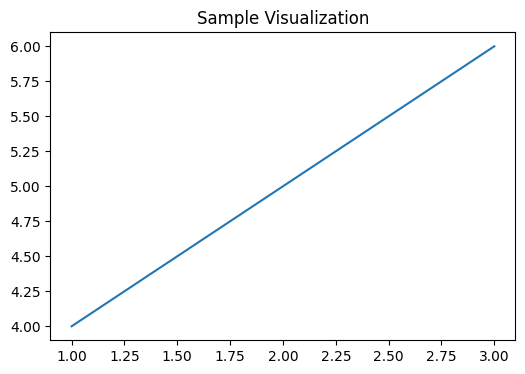

In [156]:
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
import matplotlib.pyplot as plt
import os

# Define the PDF file path
pdf_path = "\\Users\\neha.gupta5\\Downloads\\NYC_Taxi_Analysis.pdf"

# Create a PDF document
c = canvas.Canvas(pdf_path, pagesize=letter)
c.setFont("Helvetica", 12)

# Add Title
c.drawString(100, 750, "NYC Yellow Taxi Data Analysis Report")
c.drawString(100, 730, "---------------------------------------------")

# Example: Save a matplotlib figure
plt.figure(figsize=(6,4))
plt.plot([1,2,3], [4,5,6])  # Replace this with your actual visualization
plt.title("Sample Visualization")
plt.savefig("\\Users\\neha.gupta5\\Downloads\\plot.png")  # Save figure

# Insert the image into the PDF
c.drawImage("\\Users\\neha.gupta5\\Downloads\\plot.png", 100, 500, width=400, height=250)

# Save and close the PDF
c.save()

print(f"✅ PDF Report saved at: {pdf_path}")
